In [3]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
)
from scipy import stats
from ripple_heterogeneity.utils import custom_plots
from ripple_heterogeneity.replay import wmaze_replay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
# import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator
import os
from scipy import stats
from statannot import add_stat_annotation
from scipy.ndimage import gaussian_filter1d
import warnings
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [4]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv", index_col=0)
df = df[df.basepath.str.contains("ORproject")]
df

basepath  basename
Var1                                           
212       Z:\Data\ORproject\OR15\day1      day1
213      Z:\Data\ORproject\OR15\day10     day10
214       Z:\Data\ORproject\OR15\day2      day2
215       Z:\Data\ORproject\OR15\day3      day3
216       Z:\Data\ORproject\OR15\day4      day4
217       Z:\Data\ORproject\OR18\day1      day1
218       Z:\Data\ORproject\OR18\day2      day2
219       Z:\Data\ORproject\OR18\day3      day3
220       Z:\Data\ORproject\OR21\day2      day2
221       Z:\Data\ORproject\OR21\day4      day4
222       Z:\Data\ORproject\OR22\day1      day1
223       Z:\Data\ORproject\OR22\day3      day3
224       Z:\Data\ORproject\OR22\day4      day4
225       Z:\Data\ORproject\OR22\day5      day5
226       Z:\Data\ORproject\OR23\day1      day1
227       Z:\Data\ORproject\OR23\day5      day5
284   Z:\Data\ORproject\OR15\hc280118  hc280118
285   Z:\Data\ORproject\OR15\hc300118  hc300118

In [14]:
wmaze_replay.run(r"Z:\Data\ORproject\OR23\day1",traj_shuff=10)
# basepath = r"Z:\Data\ORproject\OR23\day1"

# putativeCellType="Pyr"  # cell type to use for putative cells
# brainRegion="CA1" 

# epoch_df = loading.load_epoch(basepath)
# session_bounds = nel.EpochArray(
#     [epoch_df.startTime.iloc[0], epoch_df.stopTime.iloc[-1]]
# )


# st_all, cell_metrics = loading.load_spikes(
#     basepath, putativeCellType=putativeCellType, brainRegion=brainRegion,support=session_bounds
# )


# ripples = loading.load_ripples_events(basepath)
# ripple_epochs = nel.EpochArray(np.array([ripples.start, ripples.stop]).T,domain=session_bounds)


In [22]:
(np.diff(ripple_epochs.stops) == 0).any()

False

In [23]:
bst = st_all.bin(ds=0.02)

In [24]:
bst[ripple_epochs]

<BinnedEventArray at 0x1b06517a700: 75 series (1,383 segments) in 3,752 bins of width 20.0 milliseconds> for a total of 1:15:040 minutes

In [77]:
save_path = (
    r"Z:\home\ryanh\projects\ripple_heterogeneity\wmaze_closed_loop_replay_v1"
    )

batch_analysis.run(
    df,
    save_path,
    wmaze_replay.run,
    parallel=True,
    overwrite=False,
    verbose=True,
    skip_if_error=False,
)
# load results
wmaze_replay.load_results(save_path)

100%|██████████| 18/18 [00:00<00:00, 6011.42it/s]


: 

## Testing below

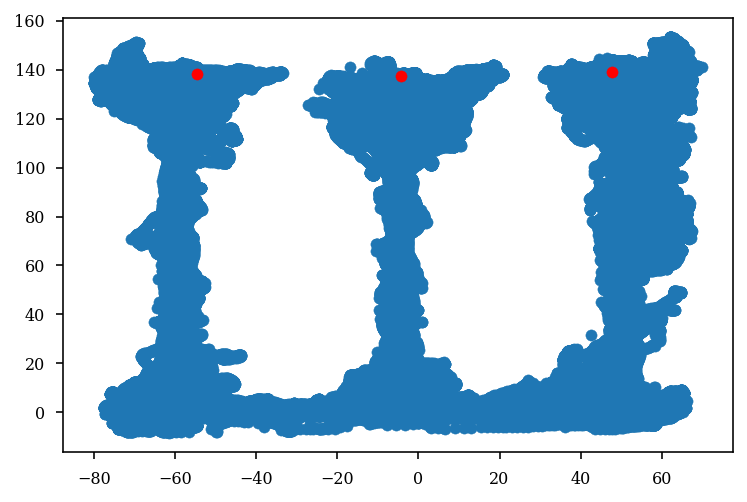

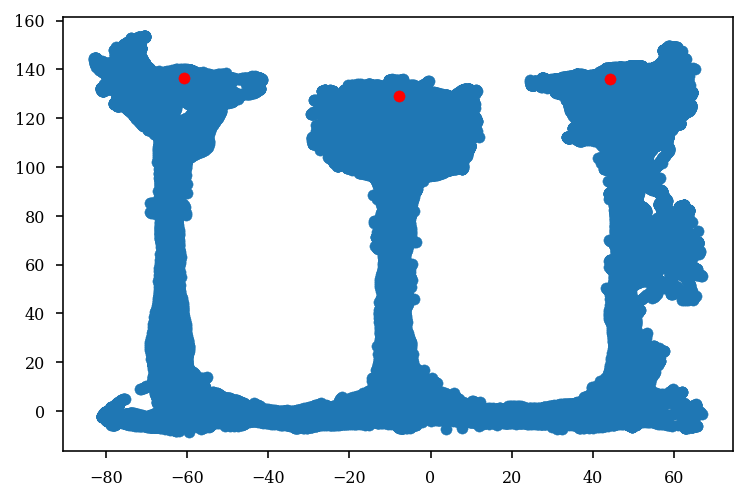

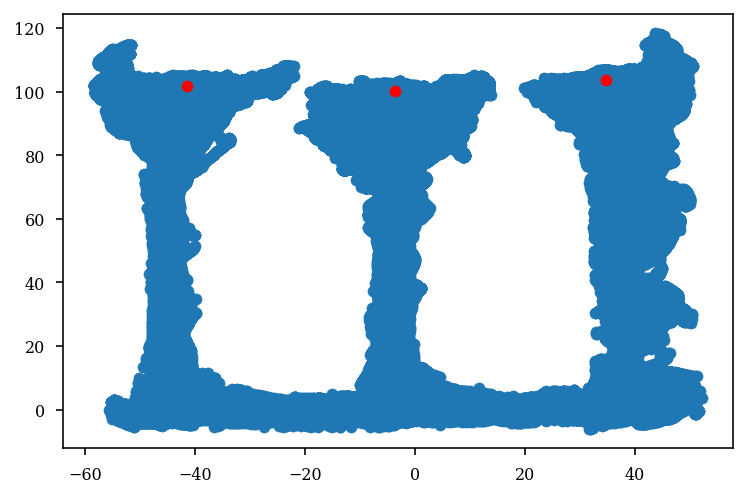

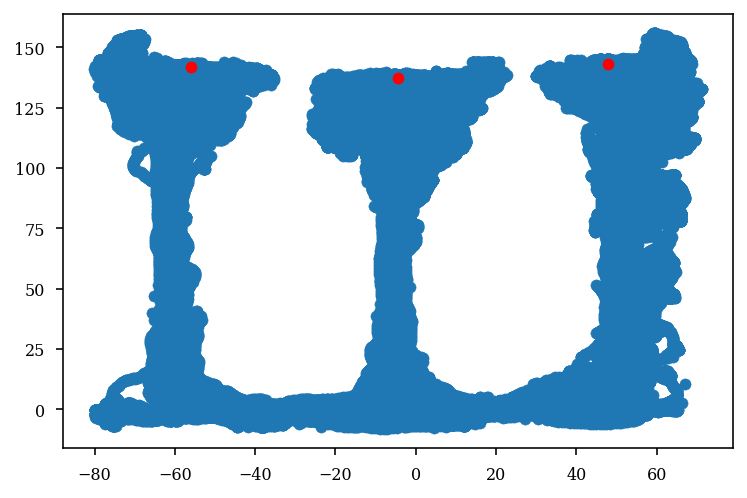

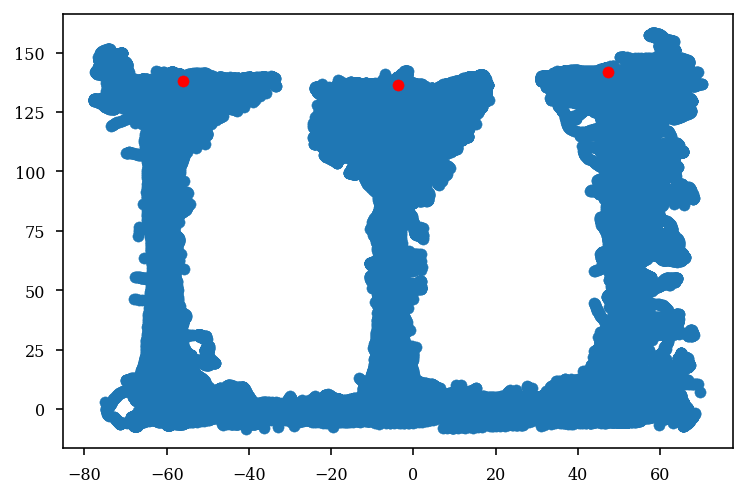

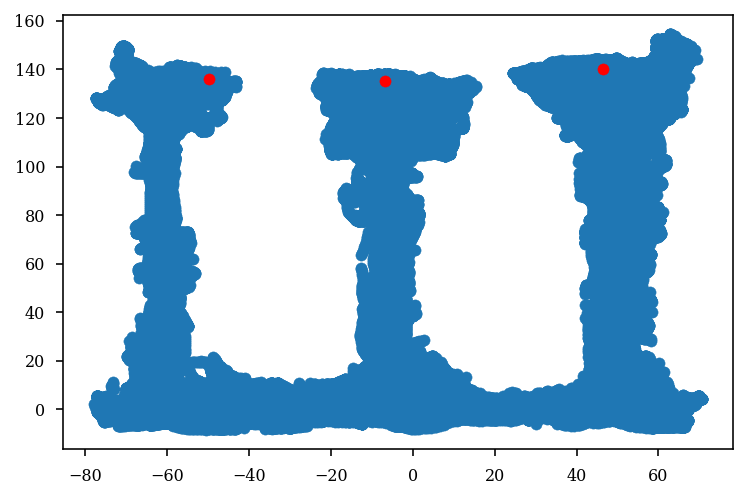

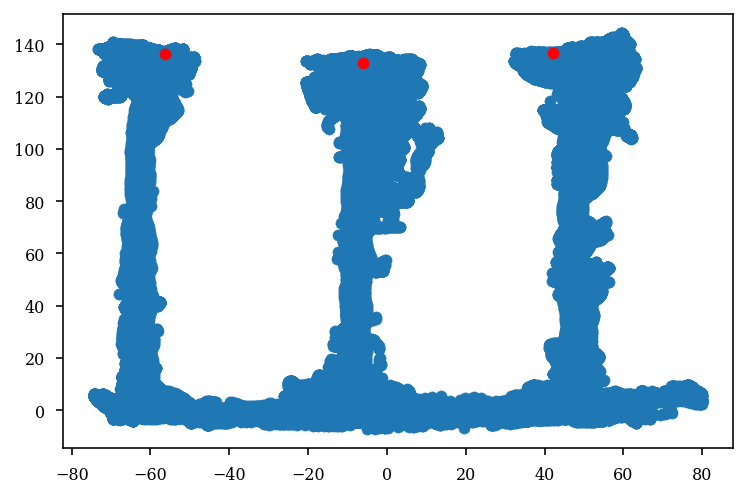

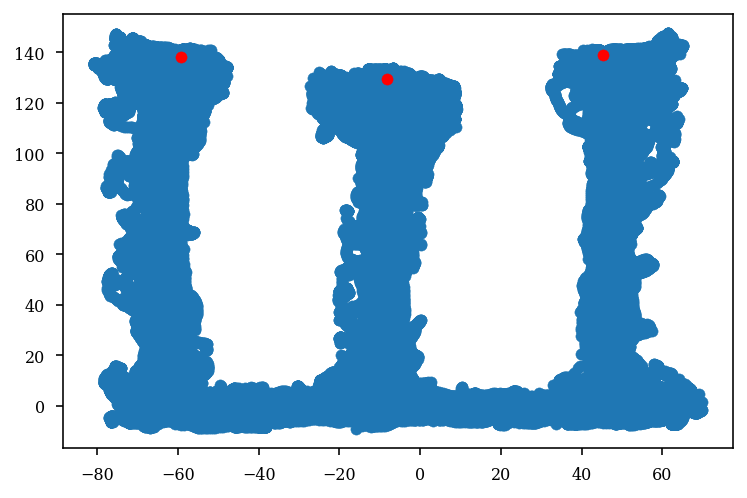

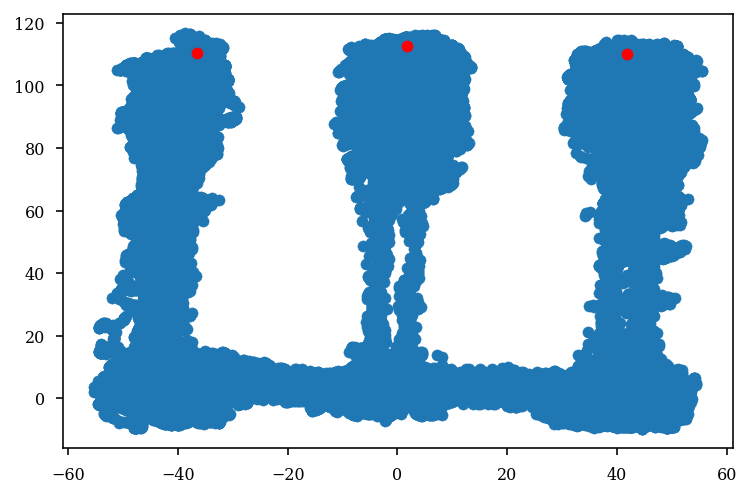

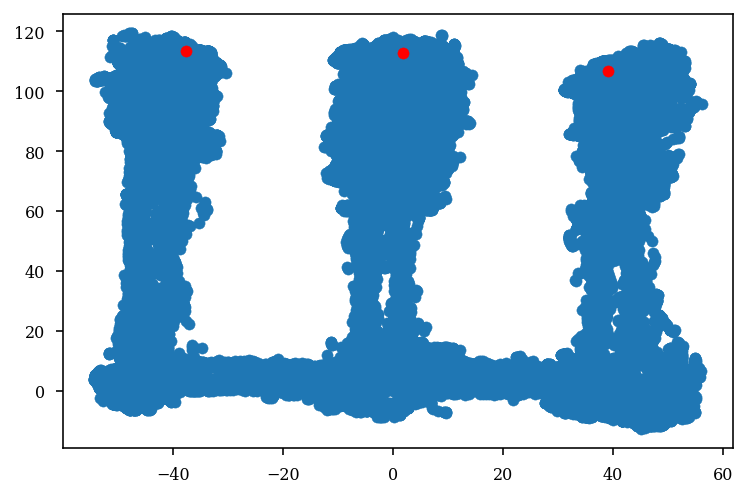

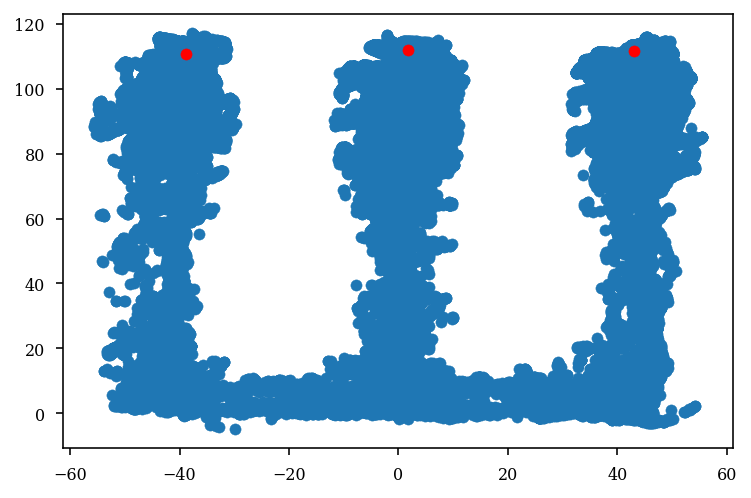

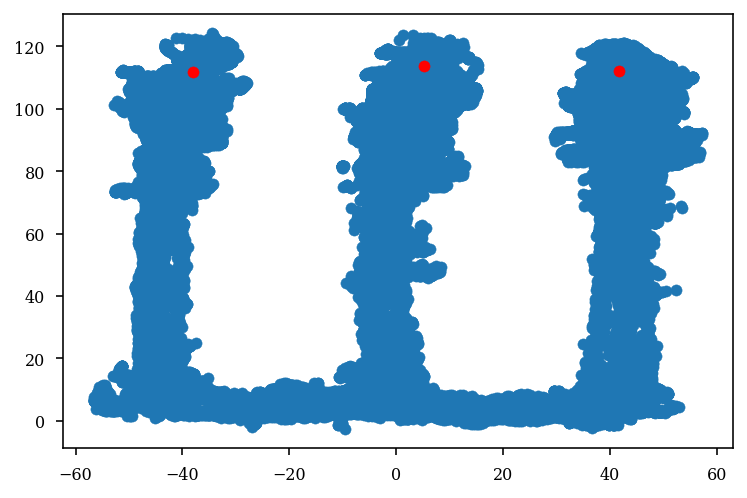

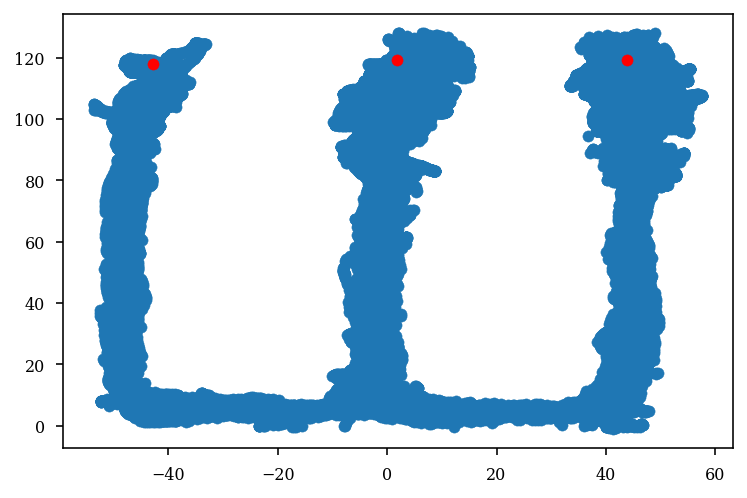

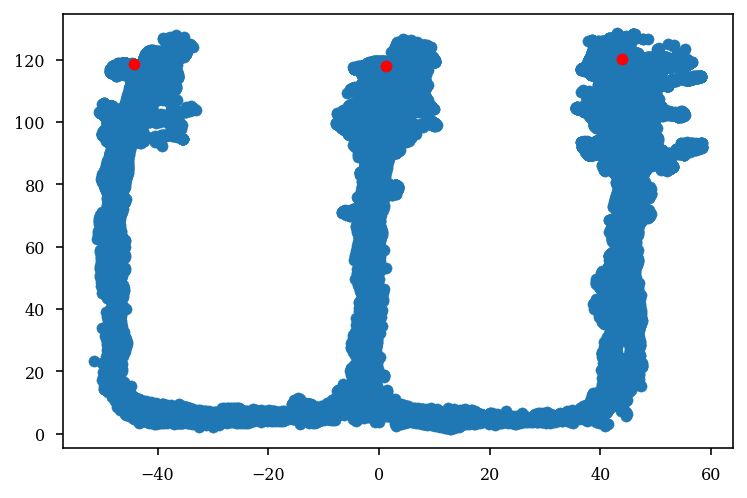

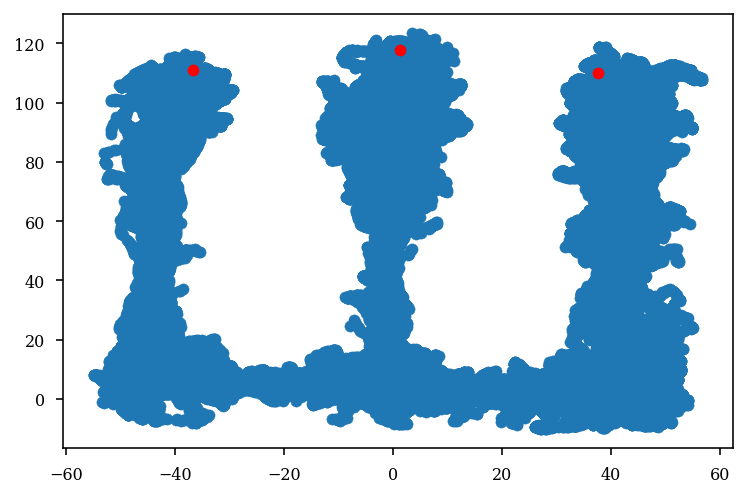

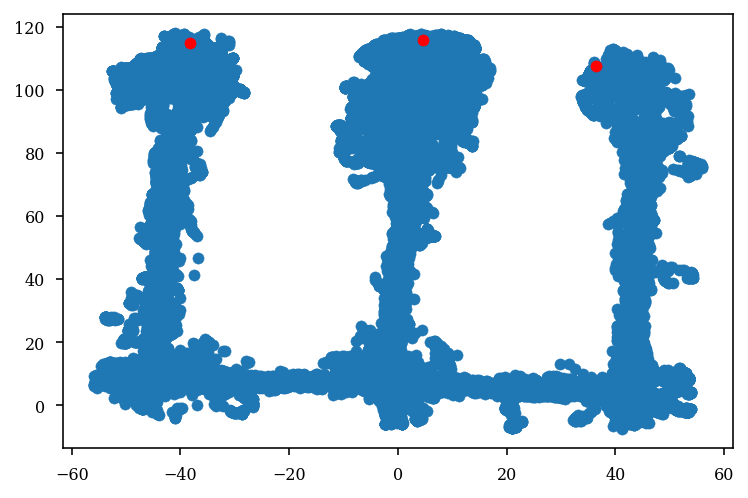

In [68]:
for basepath in df.basepath:
    position_df = loading.load_animal_behavior(basepath)
    if position_df is None:
        continue
    well_locations = np.array(
        [
            [
                position_df.query("states == 0").projected_x.mean(),
                position_df.query("states == 0").projected_y.max(),
            ],
            [
                position_df.query("states == 2").projected_x.mean(),
                position_df.query("states == 2").projected_y.max(),
            ],
            [
                position_df.query("states == 1").projected_x.mean(),
                position_df.query("states == 1").projected_y.max(),
            ],
        ]
    )

    plt.scatter(position_df.x,position_df.y)
    plt.scatter(well_locations[:,0],well_locations[:,1],c='r')
    plt.show()

In [3]:
from ripple_heterogeneity.replay import wmaze_replay
basepath = r"Z:\Data\ORproject\OR15\day1"
results = wmaze_replay.run(basepath,traj_shuff=10)

In [17]:
results.keys()

dict_keys(['center_left', 'left_center', 'center_right', 'right_center'])

In [60]:
results['center_left']['df']

start        stop  duration  n_active  inactive_bin_prop  \
1     1056.1804   1056.3772    0.1968         7           0.444444   
8     1521.3684   1521.5676    0.1992         6           0.444444   
13    1724.9404   1725.1500    0.2096         8           0.300000   
14    1867.7780   1867.9996    0.2216         7           0.181818   
17    1985.4908   1985.6860    0.1952         6           0.444444   
..          ...         ...       ...       ...                ...   
937  19149.3732  19149.5732    0.2000         5           0.444444   
938  19162.3324  19162.5524    0.2200         5           0.454545   
951  19349.4980  19349.7252    0.2272         5           0.272727   
953  19376.7052  19376.8908    0.1856         6           0.444444   
956  19410.8660  19411.0996    0.2336         5           0.363636   

     trajectory_score  r_squared      slope      intercept  \
1            0.079789   0.469108 -43.982979     408.136170   
8            0.063504   0.369699  36.215175    -348.940988   
13           0.113349   0.369468  23.446809    -402.522796   
14           0.175057   0.114421  -9.756028     374.825532   
17           0.055334   0.538432 -32.645524    1604.390205   
..                ...        ...        ...            ...   
937          0.132641   0.018954   3.234043   -8824.408511   
938          0.065534   0.095878  -7.946505   22305.561094   
951          0.096342   0.047102   8.878168  -24622.125491   
953          0.118144   0.004426   4.527660  -12497.634043   
956          0.145225   0.782816  36.498480 -102564.425532   

     score_pval_time_swap  score_pval_col_cycle   traj_dist   traj_speed  \
1                0.818182              0.818182  175.931915  2199.148936   
8                0.363636              0.818182  217.291048  1810.758731   
13               0.363636              0.363636  140.680851  1172.340426   
14               0.272727              0.090909   78.048227   487.801418   
17               0.909091              0.636364  195.873143  1632.276194   
..                    ...                   ...         ...          ...   
937              0.363636              0.090909   19.404255   161.702128   
938              1.000000              0.363636   47.679027   397.325228   
951              0.363636              0.545455   71.025342   443.908389   
953              0.090909              0.454545   18.110638   226.382979   
956              0.181818              0.090909  218.990881  1824.924012   

     traj_step replay_type  
1    43.982979     reverse  
8    54.322762     forward  
13   23.446809     forward  
14    9.756028     reverse  
17   48.968286     reverse  
..         ...         ...  
937   4.851064     forward  
938   9.535805     reverse  
951  10.146477     forward  
953   4.527660     forward  
956  36.498480     forward  

[294 rows x 15 columns]

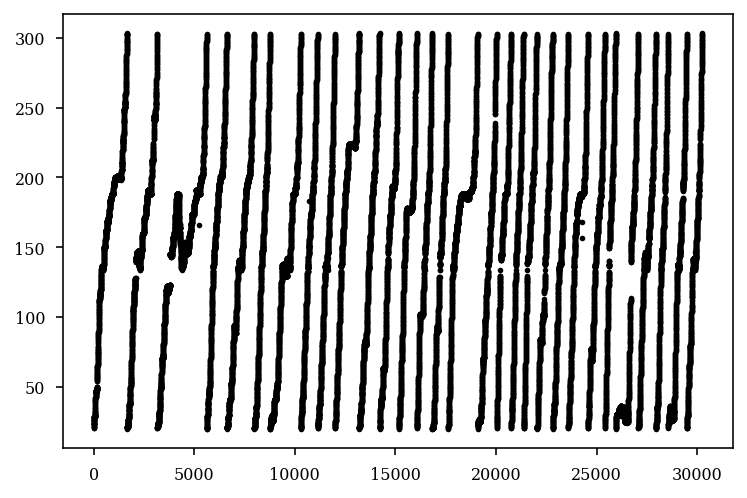

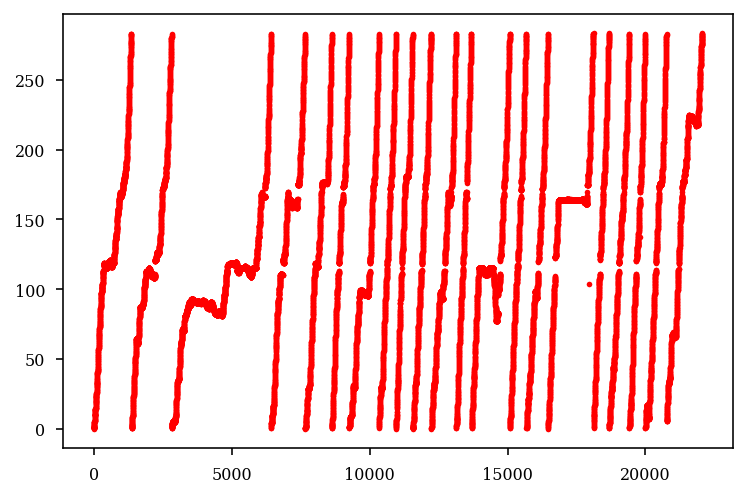

In [34]:
plt.plot(results['center_left']['pos'].data[0],'.k')
plt.show()

plt.plot(results['left_center']['pos'].data[0],'.r')
plt.show()

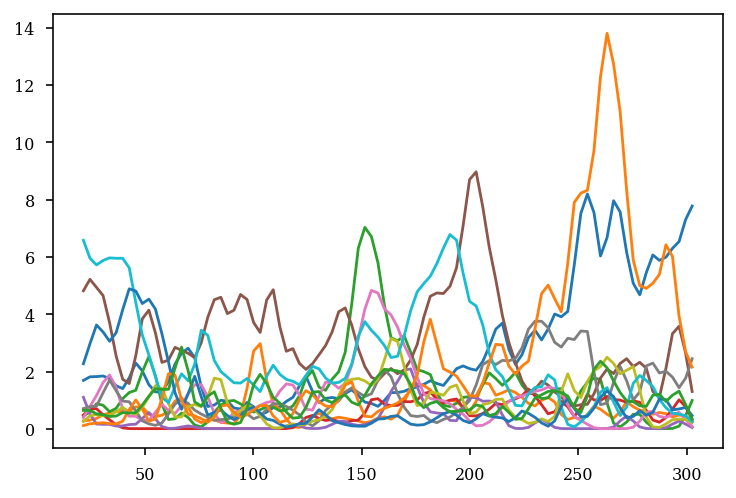

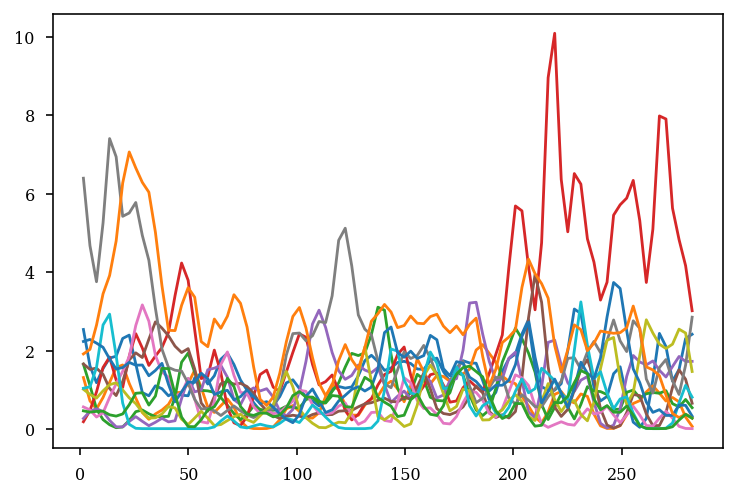

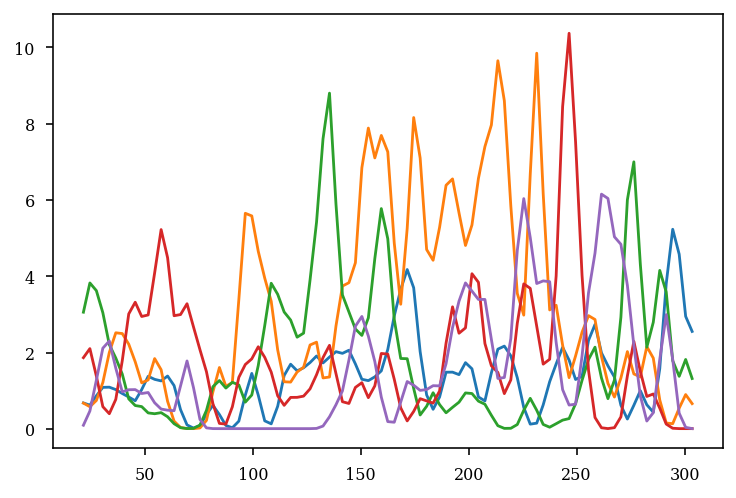

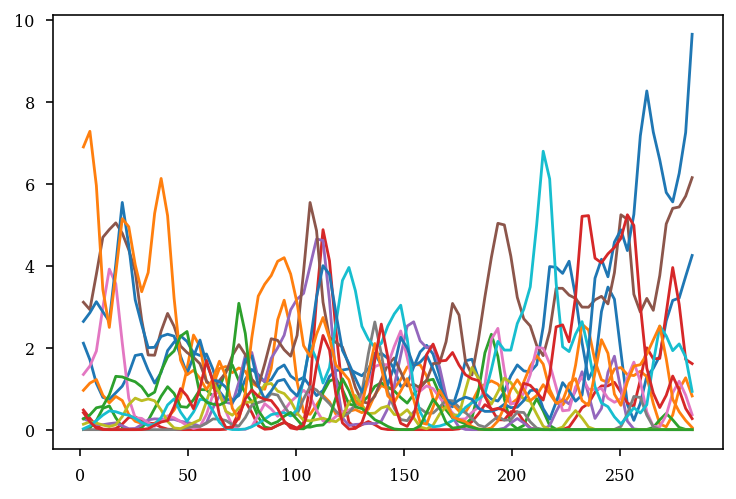

In [43]:
plt.plot(results['center_left']['tc'].bin_centers, results['center_left']['tc'].ratemap.T)
plt.show()

plt.plot(results['left_center']['tc'].bin_centers,results['left_center']['tc'].ratemap.T)
plt.show()

plt.plot(results['center_right']['tc'].bin_centers,results['center_right']['tc'].ratemap.T)
plt.show()

plt.plot(results['right_center']['tc'].bin_centers, results['right_center']['tc'].ratemap.T)
plt.show()

In [49]:
tc_.unit_ids

[24, 11, 26, 4, 8, 7, 12, 15, 5, 17, 28, 2, 9, 22]

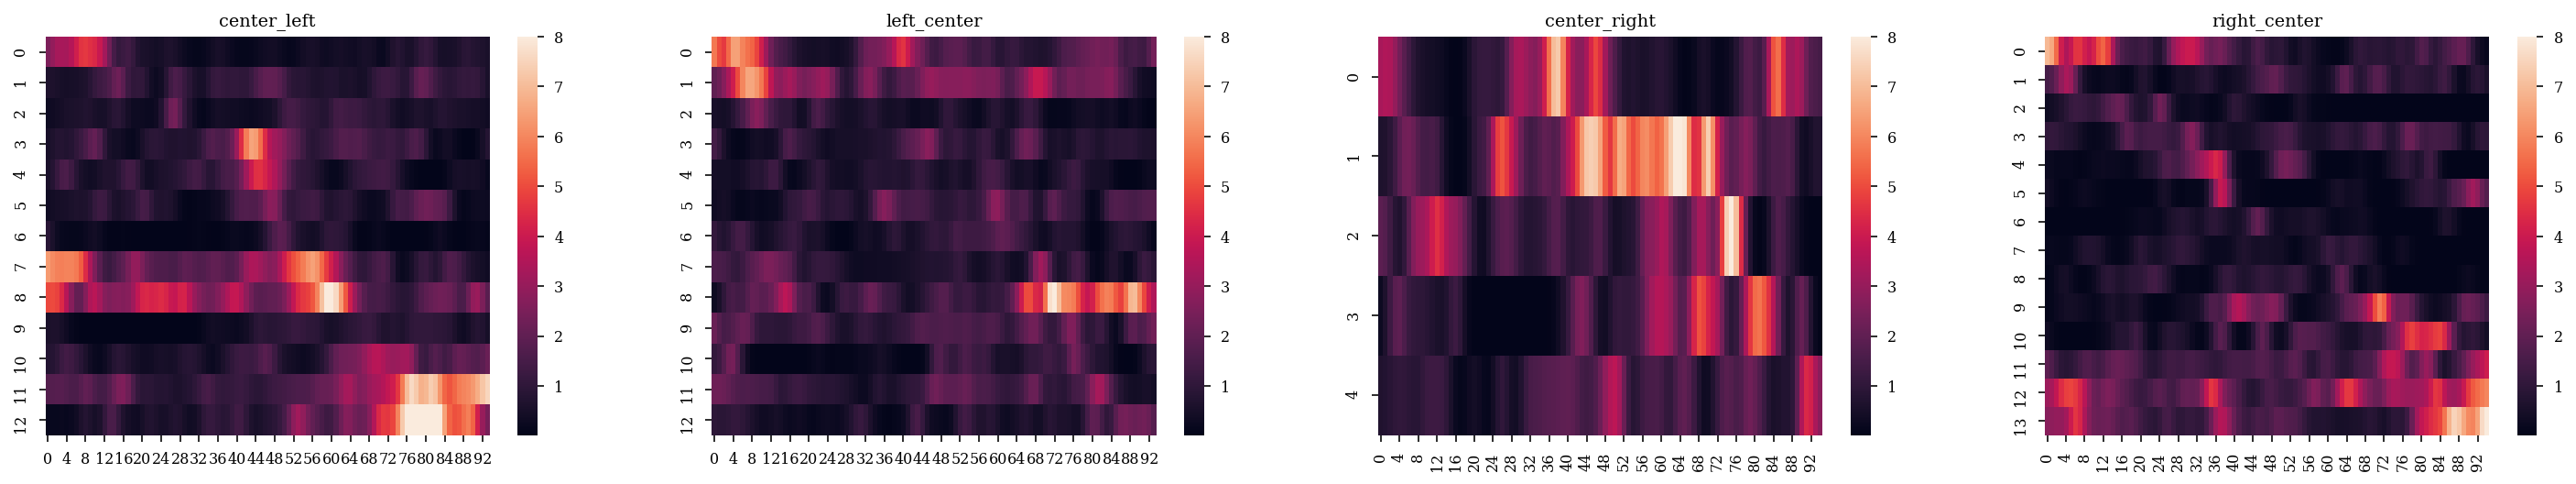

In [52]:
fig,ax = plt.subplots(1,4,figsize=(25,4))
for traj_label_i, traj_label in enumerate(results.keys()):
    tc_ = results[traj_label]['tc'].reorder_units()
    tc_ = tc_.smooth(sigma=3)
    sns.heatmap(tc_.ratemap,vmax=8,ax=ax[traj_label_i])
    ax[traj_label_i].set_title(traj_label)

In [149]:
from ripple_heterogeneity.replay import wmaze_replay
basepath = r"Z:\Data\ORproject\OR15\day1"
max_distance_from_well=20  # in cm, max distance from well to consider a well traversal
min_distance_traveled=50

position_df = loading.load_animal_behavior(basepath)

# remove nan values
bad_idx = np.isnan(position_df.linearized)
position_df = position_df[~bad_idx]

pos = nel.AnalogSignalArray(
    data=np.array(position_df.linearized),
    timestamps=position_df.time,
    fs=position_df.sr.iloc[0],
)
trajectories = wmaze_replay.get_w_maze_trajectories(
    position_df,
    max_distance_from_well=max_distance_from_well,
    min_distance_traveled=min_distance_traveled,
)
for con in trajectories.keys():
    x_slope = []
    for pos_seg in pos[trajectories[con]]:
        b1, _, _, _, _ = stats.linregress(np.arange(len(pos_seg.data[0])), pos_seg.data[0])
        x_slope.append(b1)
    if np.mean(np.array(x_slope) < 0) > .5:
        pos = wmaze_replay.flip_pos_within_epoch(pos, trajectories[con])


c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversi

In [155]:
epoch_df = loading.load_epoch(basepath)
beh_epochs = nel.EpochArray([np.array([epoch_df.startTime, epoch_df.stopTime]).T])
epoch_df
beh_epochs[epoch_df.environment == "wmaze"]

<EpochArray at 0x24194865e50: 2 epochs> of length 1:04:26:367 hours

In [135]:
trajectories

{"from_well == 'Center' & to_well == 'Left'": <EpochArray at 0x2418f809eb0: 30 epochs> of length 4:21:977 minutes,
 "from_well == 'Left' & to_well == 'Center'": <EpochArray at 0x2418f809e20: 21 epochs> of length 3:11:356 minutes,
 "from_well == 'Center' & to_well == 'Right'": <EpochArray at 0x2418f809d30: 12 epochs> of length 1:20:362 minutes,
 "from_well == 'Right' & to_well == 'Center'": <EpochArray at 0x2418f804250: 22 epochs> of length 4:41:634 minutes}

c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


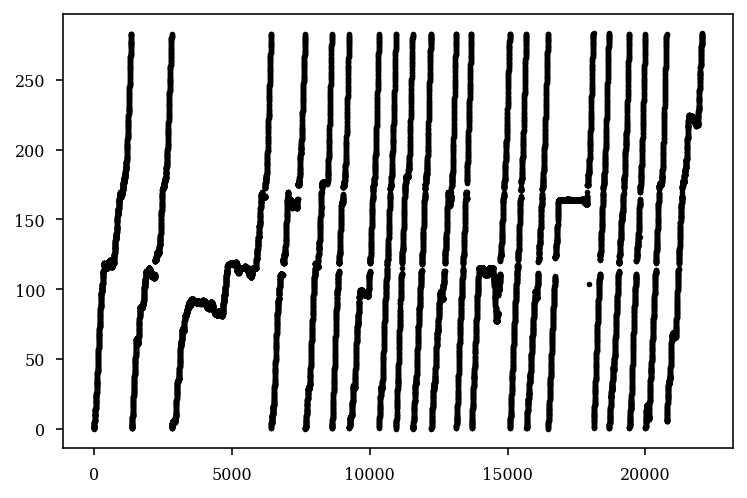

In [150]:
plt.plot(pos[trajectories["from_well == 'Left' & to_well == 'Center'"]].data[0],'.k')

In [144]:
x_slope = []
for pos_seg in pos[trajectories["from_well == 'Left' & to_well == 'Center'"]]:
    b1, _, _, _, _ = stats.linregress(np.arange(len(pos_seg.data[0])), pos_seg.data[0])
    x_slope.append(b1)

c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_ana

In [148]:

np.mean(np.array(x_slope) < 0) > .5

True

In [8]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv", index_col=0)

epoch_df = pd.DataFrame()
for basepath in df.basepath:
    temp_df = loading.load_epoch(basepath)
    temp_df["basepath"] = basepath
    epoch_df = pd.concat([epoch_df,temp_df],ignore_index=True)

In [15]:
epoch_df.environment.unique()

array(['sleep', 'linear', 'tmaze', 'cheeseboard', 'box', 'water',
       'unknown', 'open', 'linearOne', 'linearTwo', 'Tmaze', 'wheel',
       'bigSquare', 'Mwheel', 'plus', 'midSquare', 'bigSquarePlus',
       'wheel_home', 'circle', 'ZigZag', 'wmaze', 'test'], dtype=object)

In [19]:
import pickle

with open("Z:\Data\FujisawaS\EE\EE0622fm\linearization_nodes_edges.pkl", "rb") as f:
    results = pickle.load(f)

results

{'node_positions': array([[543.89884488, 282.53823713],
        [169.30034785, 245.91368425],
        [167.3727398 , 101.34308076],
        [538.11602074, 129.61466544],
        [175.08317199, 391.12682375],
        [538.75855676, 386.62907164]]),
 'edges': [[0, 1], [1, 2], [2, 3], [3, 0], [1, 4], [4, 5], [5, 0]]}

In [17]:
epoch_df.query("environment == 'tmaze'").basepath.unique()

array(['Z:\\Data\\AYAold\\AB3\\AB3_38_41',
       'Z:\\Data\\AYAold\\AB3\\AB3_42_46',
       'Z:\\Data\\AYAold\\AB3\\AB3_47_49',
       'Z:\\Data\\AYAold\\AB3\\AB3_50_51',
       'Z:\\Data\\AYAold\\AB3\\AB3_55_57',
       'Z:\\Data\\AYAold\\AB3\\AB3_60', 'Z:\\Data\\Kenji\\2006-4-18',
       'Z:\\Data\\AYAold\\AYA10\\day12',
       'Z:\\Data\\FujisawaS\\EE\\EE0622fm',
       'Z:\\Data\\FujisawaS\\EE\\EE0627fm',
       'Z:\\Data\\FujisawaS\\EE\\EE0705fm',
       'Z:\\Data\\FujisawaS\\EE\\EE0706fm',
       'Z:\\Data\\FujisawaS\\EE\\EE0708fm', 'Z:\\Data\\Can\\OML22\\day14',
       'Z:\\Data\\Can\\OML22\\day16', 'Z:\\Data\\Can\\OML22\\day18'],
      dtype=object)

In [87]:
basepath = r"Z:\Data\ORproject\OR15\day1"
position_df = loading.load_animal_behavior(basepath)
position_df

time   x   y        z  linearized units  projected_x  \
0          2.79925 NaN NaN  19.3239         NaN    cm          NaN   
1          2.80755 NaN NaN  19.3147         NaN    cm          NaN   
2          2.81590 NaN NaN  19.3118         NaN    cm          NaN   
3          2.82425 NaN NaN  19.2998         NaN    cm          NaN   
4          2.83255 NaN NaN  19.2957         NaN    cm          NaN   
...            ...  ..  ..      ...         ...   ...          ...   
455392  9890.38545 NaN NaN      NaN         NaN    cm          NaN   
455393  9890.39375 NaN NaN      NaN         NaN    cm          NaN   
455394  9890.40210 NaN NaN      NaN         NaN    cm          NaN   
455395  9890.41045 NaN NaN      NaN         NaN    cm          NaN   
455396  9890.41875 NaN NaN      NaN         NaN    cm          NaN   

        projected_y          sr  timestamps     speed  acceleration  states  \
0               NaN  119.760479     2.79925  5.304503      0.000000     NaN   
1               NaN  119.760479     2.80755  5.142359     -0.162144     NaN   
2               NaN  119.760479     2.81590  4.897786     -0.244573     NaN   
3               NaN  119.760479     2.82425  4.899227      0.001441     NaN   
4               NaN  119.760479     2.83255  4.660540     -0.238687     NaN   
...             ...         ...         ...       ...           ...     ...   
455392          NaN  119.760479  9890.38545       NaN           NaN     NaN   
455393          NaN  119.760479  9890.39375       NaN           NaN     NaN   
455394          NaN  119.760479  9890.40210       NaN           NaN     NaN   
455395          NaN  119.760479  9890.41045       NaN           NaN     NaN   
455396          NaN  119.760479  9890.41875       NaN           NaN     NaN   

                          epochs environment  
0       OR15day1_1_180116_095729       wmaze  
1       OR15day1_1_180116_095729       wmaze  
2       OR15day1_1_180116_095729       wmaze  
3       OR15day1_1_180116_095729       wmaze  
4       OR15day1_1_180116_095729       wmaze  
...                          ...         ...  
455392  OR15day1_2_180116_171020       wmaze  
455393  OR15day1_2_180116_171020       wmaze  
455394  OR15day1_2_180116_171020       wmaze  
455395  OR15day1_2_180116_171020       wmaze  
455396  OR15day1_2_180116_171020       wmaze  

[455397 rows x 15 columns]

In [120]:
from ripple_heterogeneity.utils import well_traversal_classification

well_locations = np.array(
    [
        [
            position_df.query("states == 0").projected_x.mean(),
            position_df.query("states == 0").projected_y.max(),
        ],
        [
            position_df.query("states == 2").projected_x.mean(),
            position_df.query("states == 2").projected_y.max(),
        ],
        [
            position_df.query("states == 1").projected_x.mean(),
            position_df.query("states == 1").projected_y.max(),
        ]
    ]
)
temp_df = position_df[~np.isnan(position_df.x)]
segments_df, labeled_segments = well_traversal_classification.segment_path(
    temp_df["timestamps"].values,
    temp_df[["projected_x", "projected_y"]].values,
    well_locations,
    max_distance_from_well=20,
)


segments_df = well_traversal_classification.score_inbound_outbound(segments_df, min_distance_traveled=50)
segments_df

start_time    end_time  duration from_well to_well  \
segment                                                       
2           8.17395    15.34020   7.16625     Right   Right   
3          77.42845    93.33595  15.90750     Right   Right   
16        115.53470   136.67520  21.14050     Right  Center   
21        170.67335   185.82255  15.14920    Center    Left   
22        193.75545   211.74610  17.99065      Left   Right   
...             ...         ...       ...       ...     ...   
304      9747.56820  9752.94290   5.37470    Center   Right   
305      9791.33250  9800.47365   9.14115     Right  Center   
306      9837.91330  9844.40460   6.49130    Center    Left   
311      9860.92870  9873.25305  12.32435      Left  Center   
312      9876.91115  9883.42750   6.51635    Center   Right   

         distance_traveled      task  is_correct   turn  
segment                                                  
2               164.260527   Inbound       False  Right  
3               355.907822   Inbound       False  Right  
16              506.015701   Inbound        True  Right  
21              347.573160  Outbound        True  Right  
22              461.307941   Inbound       False   Left  
...                    ...       ...         ...    ...  
304             331.989649  Outbound        True   Left  
305             348.570930   Inbound        True  Right  
306             333.651364  Outbound        True  Right  
311             337.705730   Inbound        True   Left  
312              78.072300  Outbound        True   Left  

[122 rows x 9 columns]

(8000.0, 10000.0)

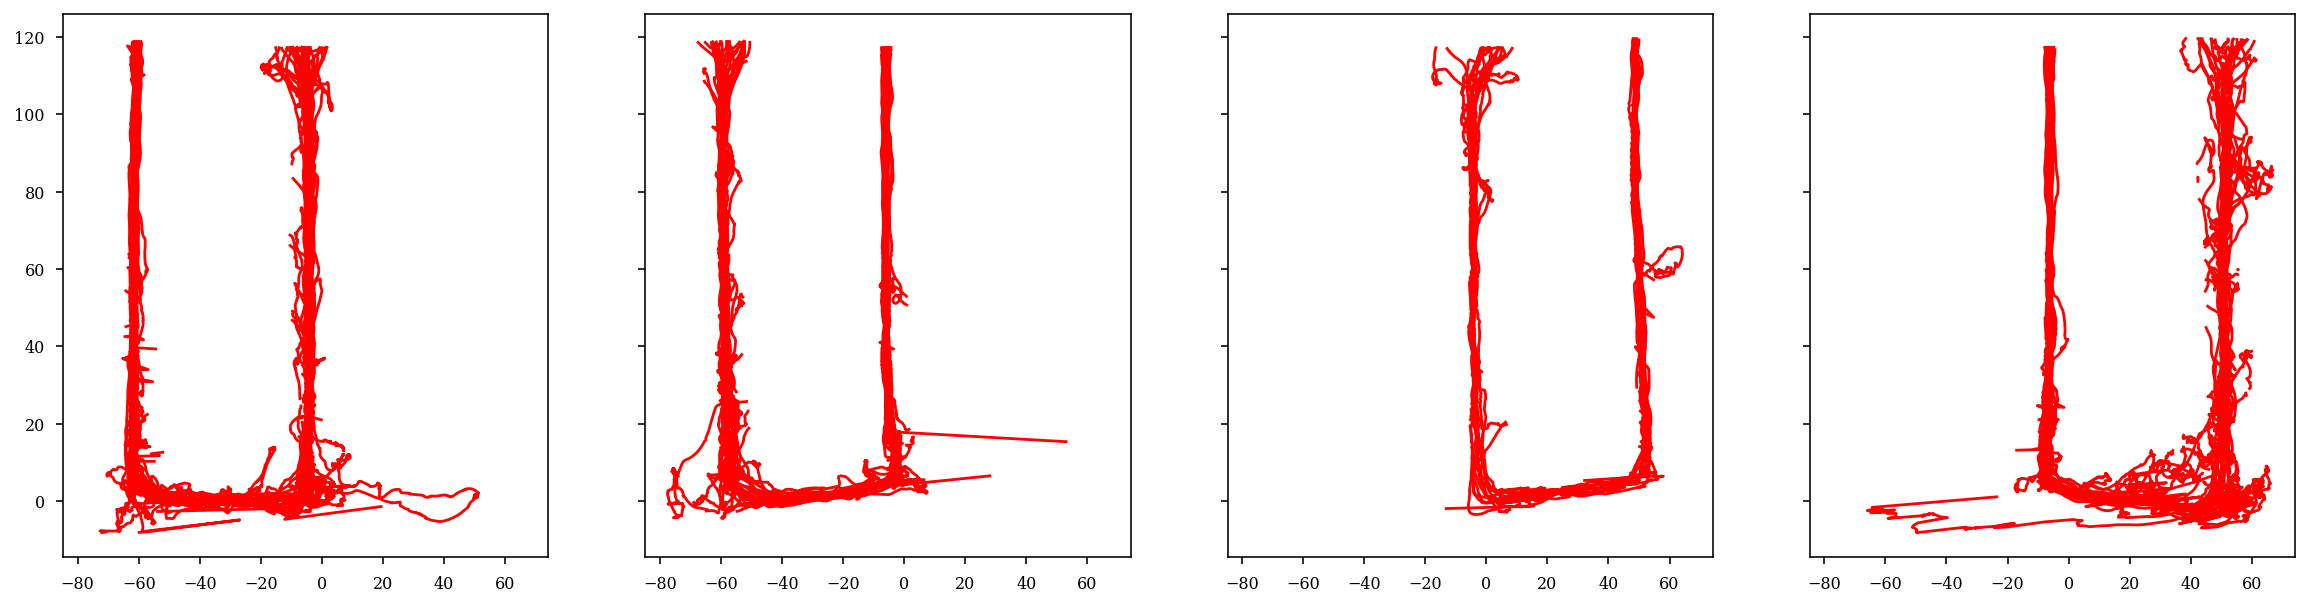

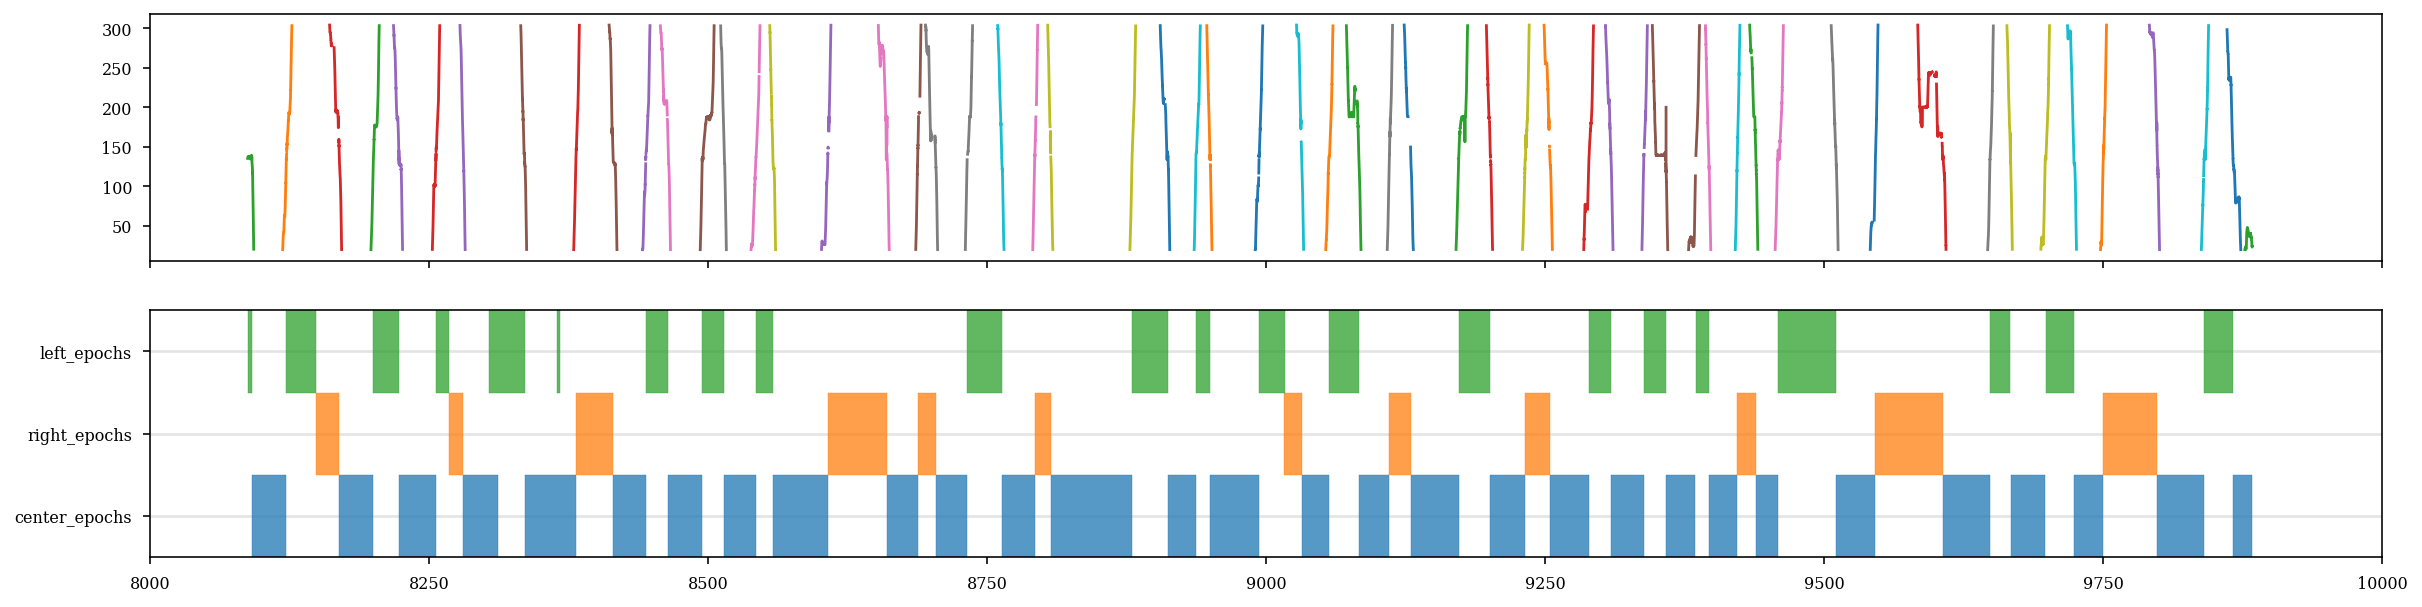

In [128]:
conditions = ["from_well == 'Center' & to_well == 'Left'",
"from_well == 'Left' & to_well == 'Center'",
"from_well == 'Center' & to_well == 'Right'",
"from_well == 'Right' & to_well == 'Center'"]

fig,ax = plt.subplots(1,4,figsize=(20, 5),sharey=True,sharex=True)
for con_i, con in enumerate(conditions):
    for ep in segments_df.query(con).itertuples():
        # position_df.timestamps.between_time(ep.start_time, ep.end_time)
        idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
        ax[con_i].plot(
            position_df[idx].x,
            position_df[idx].y,
            color="red"
        )

fig,axs = plt.subplots(2,1,figsize=(20, 5),sharey=False,sharex=True)
for con_i, con in enumerate(conditions):
    for ep in segments_df.query(con).itertuples():
        # position_df.timestamps.between_time(ep.start_time, ep.end_time)
        idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
        axs[0].plot(
            position_df[idx].timestamps,
            position_df[idx].linearized,
        )

# events.append(center_epochs)
# events.append(right_epochs)
# events.append(left_epochs)
custom_plots.plot_events(events,['center_epochs','right_epochs','left_epochs'],ax=axs[1])
axs[0].set_xlim(8000, 10000)


<AxesSubplot:xlabel='x', ylabel='y'>

c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


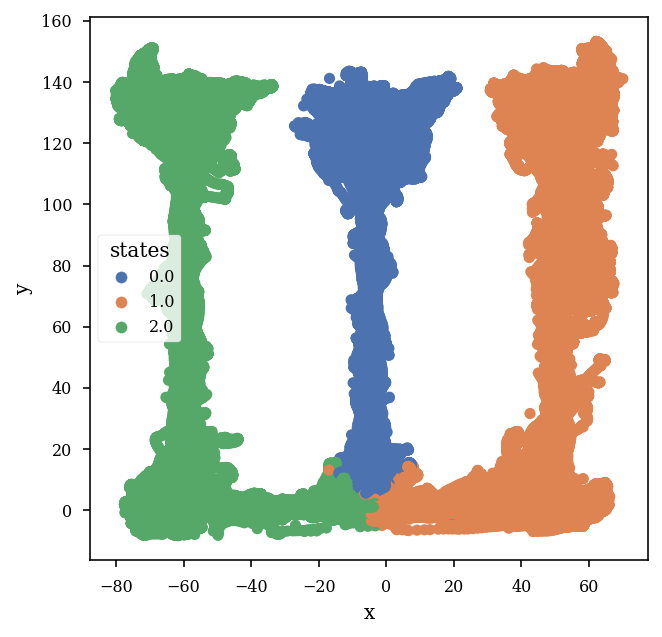

In [89]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="x",y="y",hue="states", data=position_df,palette="deep",linewidth=0)

<AxesSubplot:xlabel='timestamps', ylabel='linearized'>

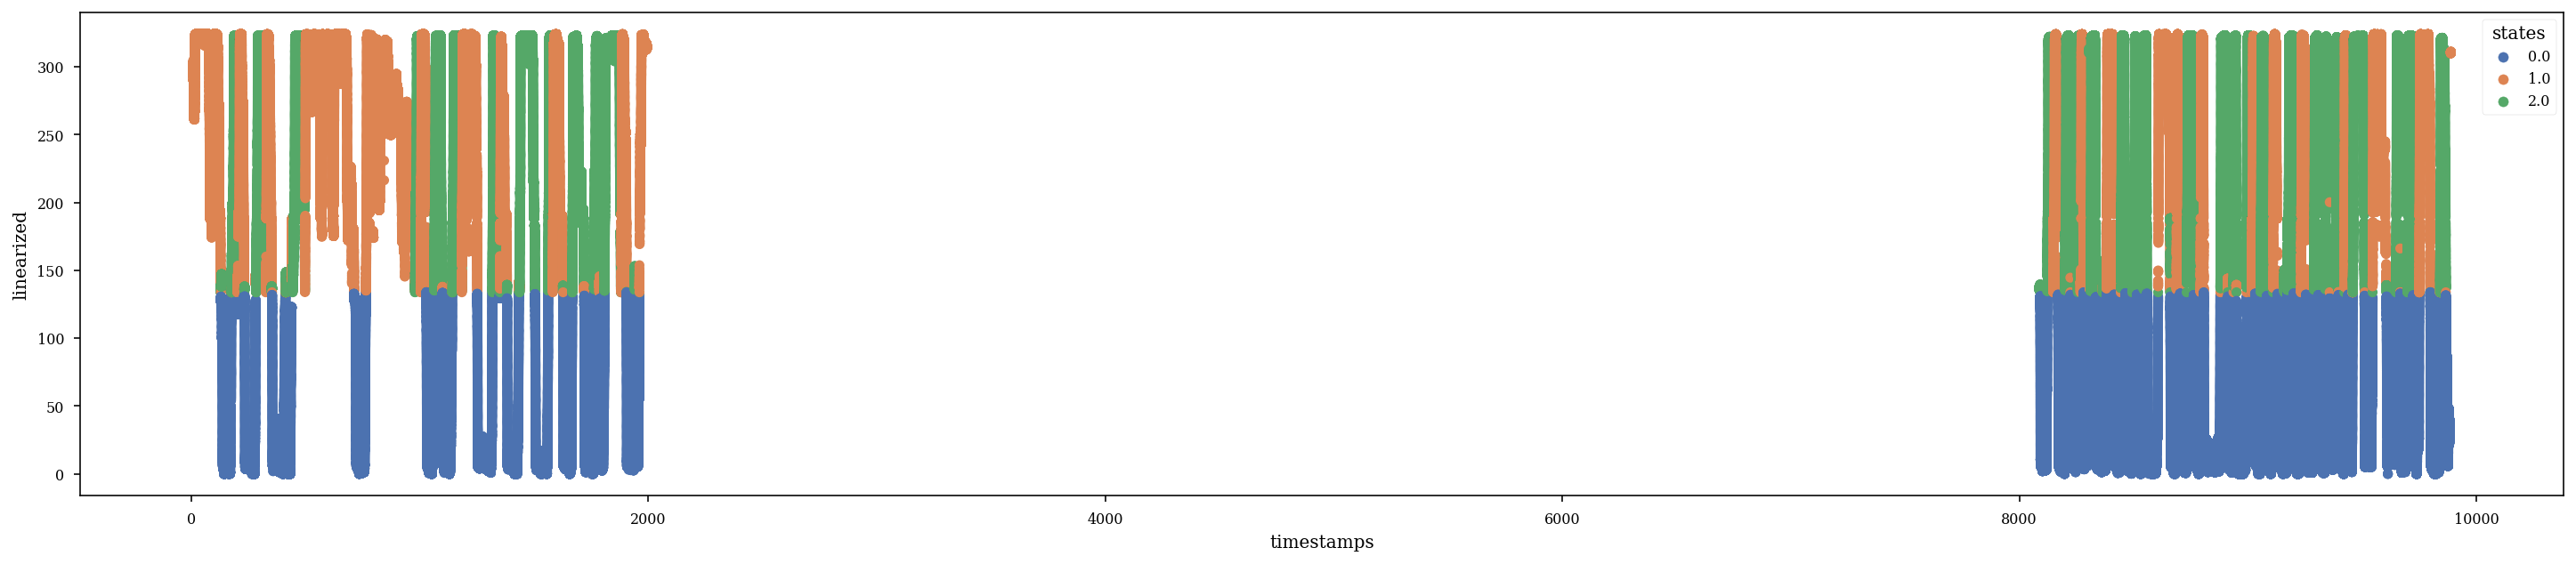

In [24]:
plt.figure(figsize=(25,5))
sns.scatterplot(x="timestamps",y="linearized",hue="states", data=position_df,palette="deep",linewidth=0)
# plt.xlim(0,500)

In [90]:
epochs_df = loading.load_epoch(basepath)
epochs = nel.EpochArray(np.array([epochs_df.startTime, epochs_df.stopTime]).T)
display(epochs_df)
epochs

name  startTime     stopTime environment
0       OR15day1_1_180116_095729      0.000   2001.59995       wmaze
1  OR15day1_sleep1_180116_110120   2001.600   8087.29195       sleep
2       OR15day1_2_180116_171020   8087.292   9952.05995       wmaze
3  OR15day1_sleep2_180116_181618   9952.060  19424.00000       sleep

<EpochArray at 0x2418bbef250: 4 epochs> of length 5:23:44 hours

In [91]:
bad_idx = np.isnan(position_df.linearized)
beh_df = position_df[~bad_idx]

pos = nel.AnalogSignalArray(
    data=np.array(position_df.linearized),
    timestamps=position_df.time,
    fs=position_df.sr.iloc[0],
)
pos = pos[epochs[2]]

ts = position_df.query("states==0").timestamps.values
center_epochs = nel.EpochArray(np.array([ts,ts]).T).merge(gap=1)

ts = position_df.query("states==1").timestamps.values
right_epochs = nel.EpochArray(np.array([ts,ts]).T).merge(gap=1)

ts = position_df.query("states==2").timestamps.values
left_epochs = nel.EpochArray(np.array([ts,ts]).T).merge(gap=1)

center_epochs = center_epochs[epochs[2]]
right_epochs = right_epochs[epochs[2]]
left_epochs = left_epochs[epochs[2]]

center_epochs._data = center_epochs.merge(gap=10).data[center_epochs.merge(gap=10).durations > 2]
right_epochs._data = right_epochs.merge(gap=10).data[right_epochs.merge(gap=10).durations > 2]
left_epochs._data = left_epochs.merge(gap=10).data[left_epochs.merge(gap=10).durations > 2]


c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


In [93]:
import warnings
warnings.filterwarnings("ignore")
def find_good_laps(pos, dir_epoch, thres=0.5, binsize=6, min_laps=10):
    """
    find_good_laps: finds good laps in behavior data
        Made to find good laps in nelpy array for replay analysis
    input:
        pos: nelpy analog array with single dim
        dir_epoch: epoch to flip
        thres: occupancy threshold for good lap
        binsize: size of bins to calculate occupancy
    output:
        good_laps: epoch array of good laps
    """
    # make bin edges to calc occupancy
    x_edges = np.arange(np.nanmin(pos.data[0]), np.nanmax(pos.data[0]), binsize)
    # initialize occupancy matrix (position x time)
    occ = np.zeros([len(x_edges) - 1, dir_epoch.n_intervals])
    # iterate through laps
    for i, ep in enumerate(dir_epoch):
        # bin position per lap
        occ[:, i], _ = np.histogram(pos[ep].data[0], bins=x_edges)
    # calc percent occupancy over position bins per lap and find good laps
    good_laps = np.where(~((np.sum(occ == 0, axis=0) / occ.shape[0]) > thres))[0]
    # if no good laps, return empty epoch
    if (len(good_laps) == 0) | (len(good_laps) < min_laps):
        dir_epoch = nel.EpochArray()
    else:
        dir_epoch = dir_epoch[good_laps]
    return dir_epoch

(outbound_epochs, inbound_epochs) = functions.get_linear_track_lap_epochs(
    pos.abscissa_vals, pos.data[0], newLapThreshold=20
)
outbound_epochs = find_good_laps(pos, outbound_epochs)
inbound_epochs = find_good_laps(pos, inbound_epochs)
outbound_epochs, inbound_epochs

(<EpochArray at 0x1d46d75d550: 29 epochs> of length 11:47:344 minutes,
 <EpochArray at 0x1d463e56850: 29 epochs> of length 17:25:443 minutes)

In [94]:
center_right,center_epochs,right_epochs

(<EpochArray at 0x1d46386da30: 34 epochs> of length 47:10:461 minutes,
 <EpochArray at 0x1d463f878b0: 35 epochs> of length 16:15:205 minutes,
 <EpochArray at 0x1d463aa0190: 44 epochs> of length 5:15:074 minutes)

In [110]:
(center_epochs | right_epochs).merge(), (center_epochs + right_epochs)


(<EpochArray at 0x1d45e98f0d0: 77 epochs> of length 21:29:846 minutes,
 <EpochArray at 0x1d45e98fb50: 79 epochs> of length 21:29:846 minutes)

In [189]:
# right_epochs._data

# _data
right_epochs._data = right_epochs.merge(gap=10).data[right_epochs.merge(gap=10).durations > 2]

In [190]:
right_epochs

<EpochArray at 0x1d463aa0190: 12 epochs> of length 5:33:840 minutes

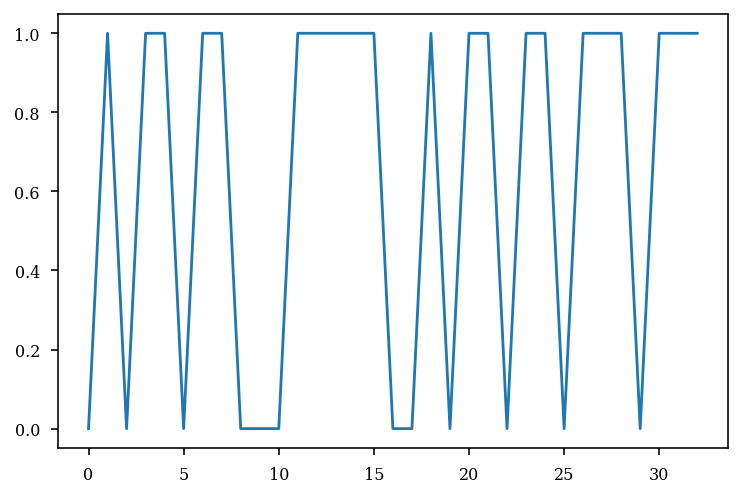

In [187]:
plt.plot(right_epochs.merge(gap=10).durations > 2)
plt.show()

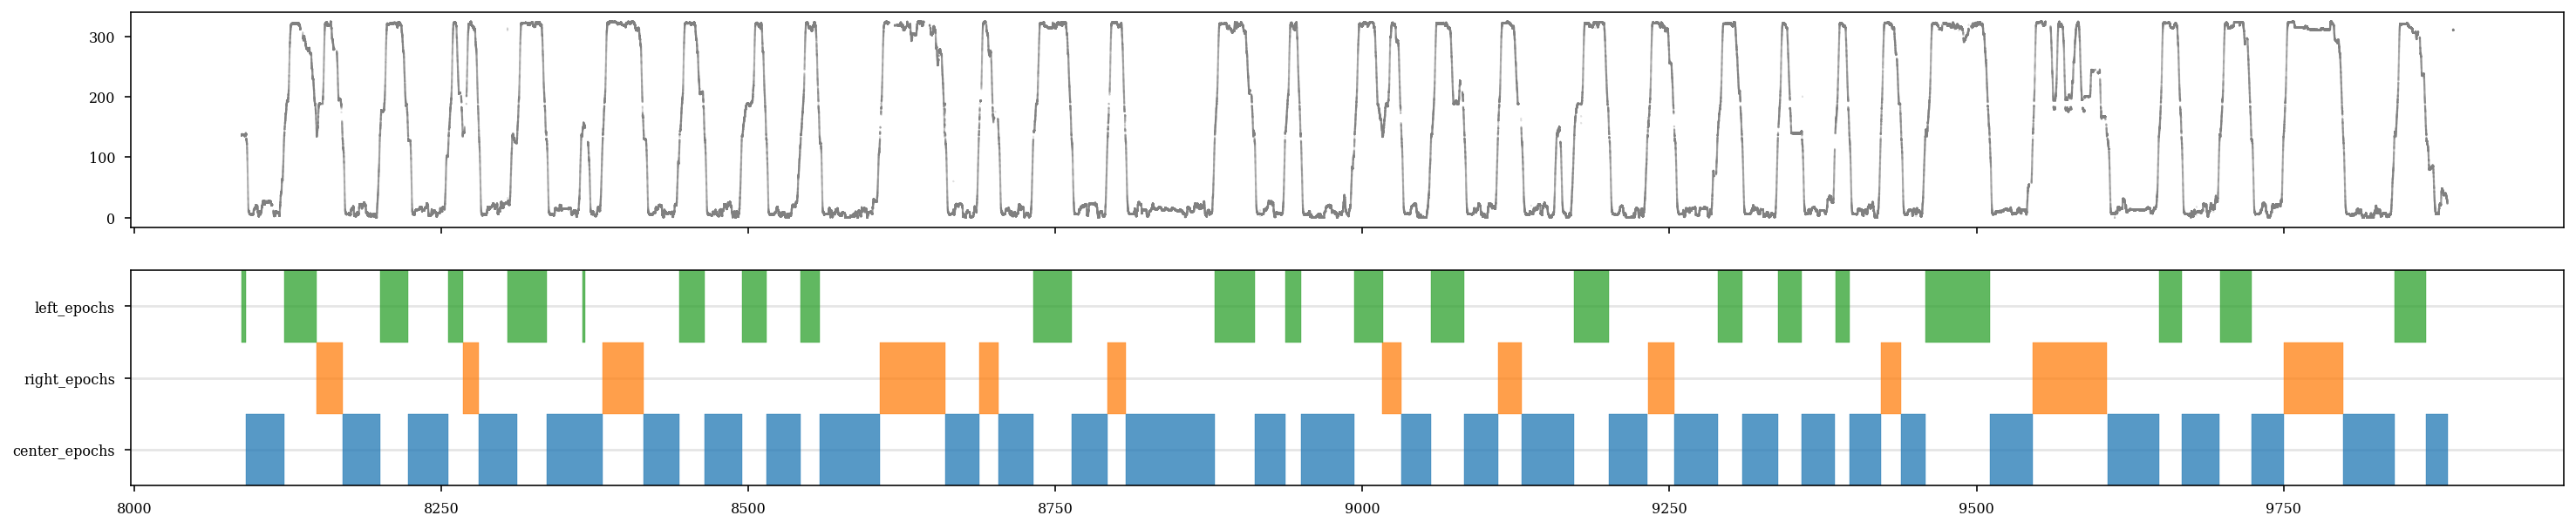

In [92]:
fig, ax = plt.subplots(2, 1, figsize=(25, 5), sharex=True, sharey=False)
ax[0].scatter(pos.abscissa_vals, pos.data, s=1,color='grey',alpha=.2,linestyle="--")

events = []

events.append(center_epochs)
events.append(right_epochs)
events.append(left_epochs)
custom_plots.plot_events(events,['center_epochs','right_epochs','left_epochs'],ax=ax[1])


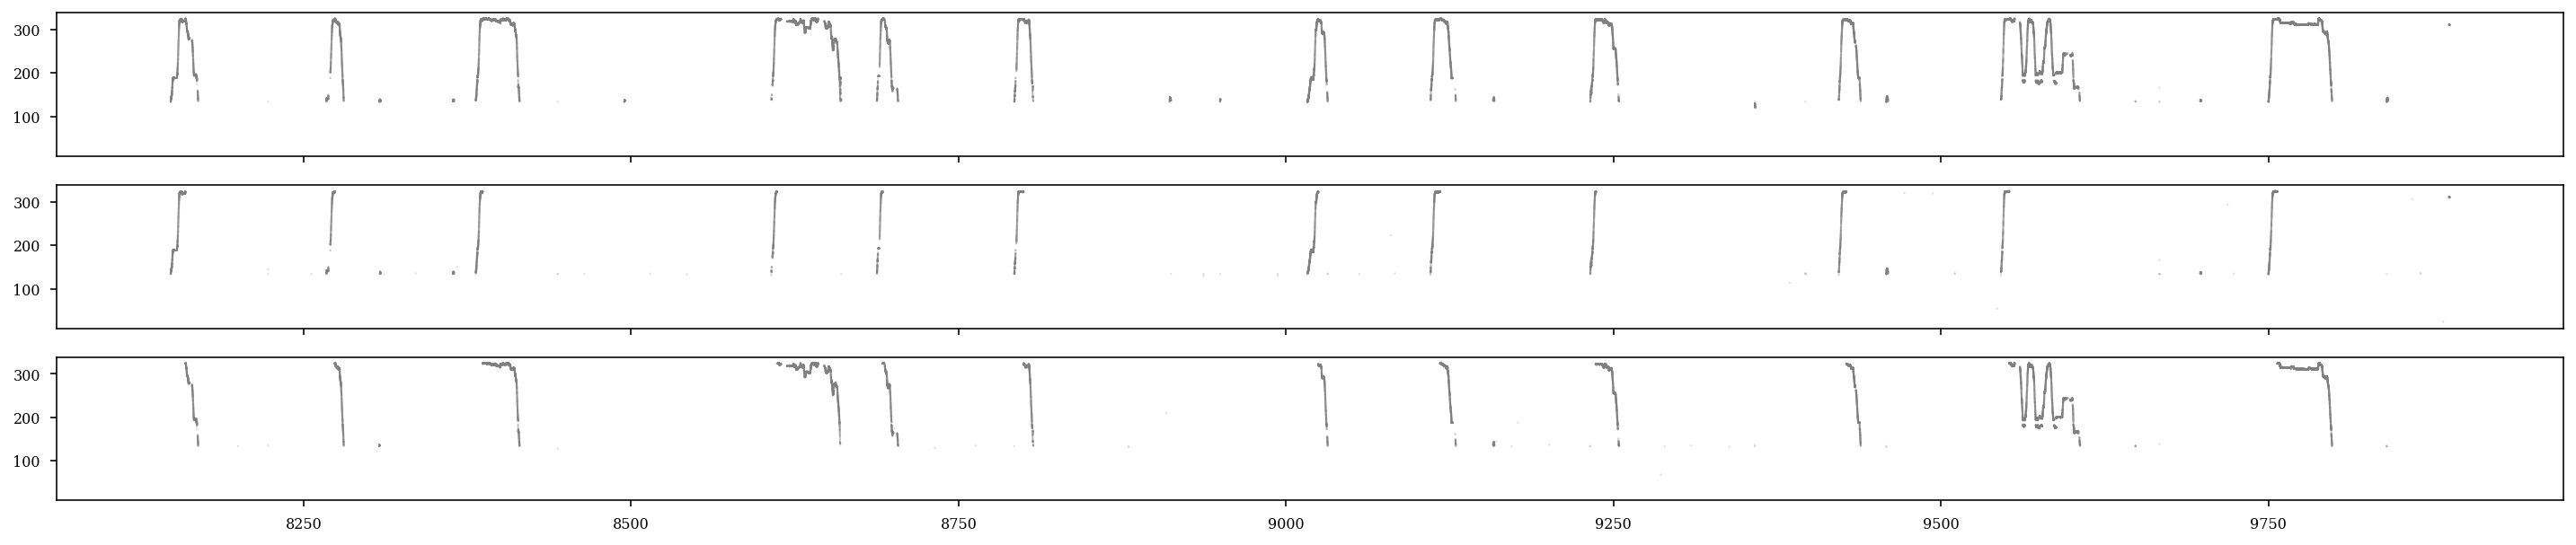

In [147]:
fig, ax = plt.subplots(3, 1, figsize=(25, 5), sharex=True, sharey=True)
ax[0].scatter(pos[right_epochs].abscissa_vals, pos[right_epochs].data, s=1,color='grey',alpha=.2,linestyle="--")

(outbound_epochs, inbound_epochs) = functions.get_linear_track_lap_epochs(
    pos[right_epochs].abscissa_vals,
    pos[right_epochs].data[0],
    newLapThreshold=10,
)
ax[1].scatter(pos[outbound_epochs][~(center_epochs | left_epochs)].abscissa_vals, pos[outbound_epochs][~(center_epochs | left_epochs)].data, s=1,color='grey',alpha=.2,linestyle="--")
ax[2].scatter(pos[inbound_epochs][~(center_epochs | left_epochs)].abscissa_vals, pos[inbound_epochs][~(center_epochs | left_epochs)].data, s=1,color='grey',alpha=.2,linestyle="--")


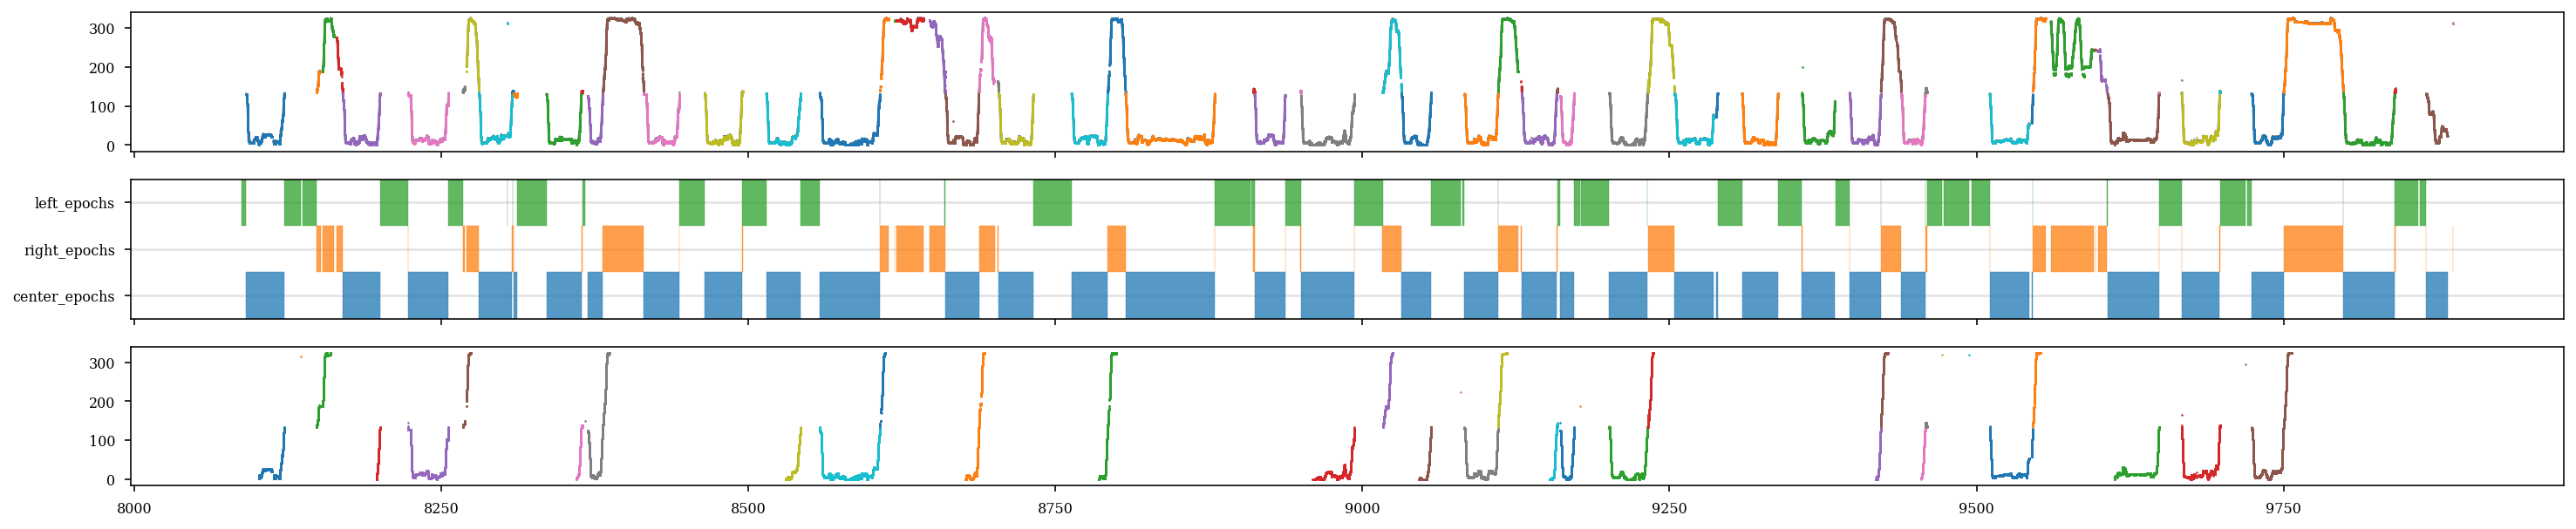

In [141]:
fig, ax = plt.subplots(3, 1, figsize=(25, 5), sharex=True, sharey=False)
center_right = (center_epochs | right_epochs)

ax[0].scatter(pos[center_right].abscissa_vals, pos[center_right].data, s=1,color='grey',alpha=.2,linestyle="--")

for ep in center_right:
    ax[0].scatter(pos[ep].abscissa_vals, pos[ep].data, s=1)

events = []
events.append(center_epochs)
events.append(right_epochs)
events.append(left_epochs)
custom_plots.plot_events(events,['center_epochs','right_epochs','left_epochs'],ax=ax[1])

(outbound_epochs_new, inbound_epochs_new) = functions.get_linear_track_lap_epochs(
    pos[center_right].abscissa_vals,
    pos[center_right].data[0],
    newLapThreshold=10,
)
outbound_epochs_new = find_good_laps(pos[center_right], outbound_epochs_new)

for ep in outbound_epochs_new[~left_epochs]:
    ax[2].scatter(pos[ep].abscissa_vals, pos[ep].data, s=1)


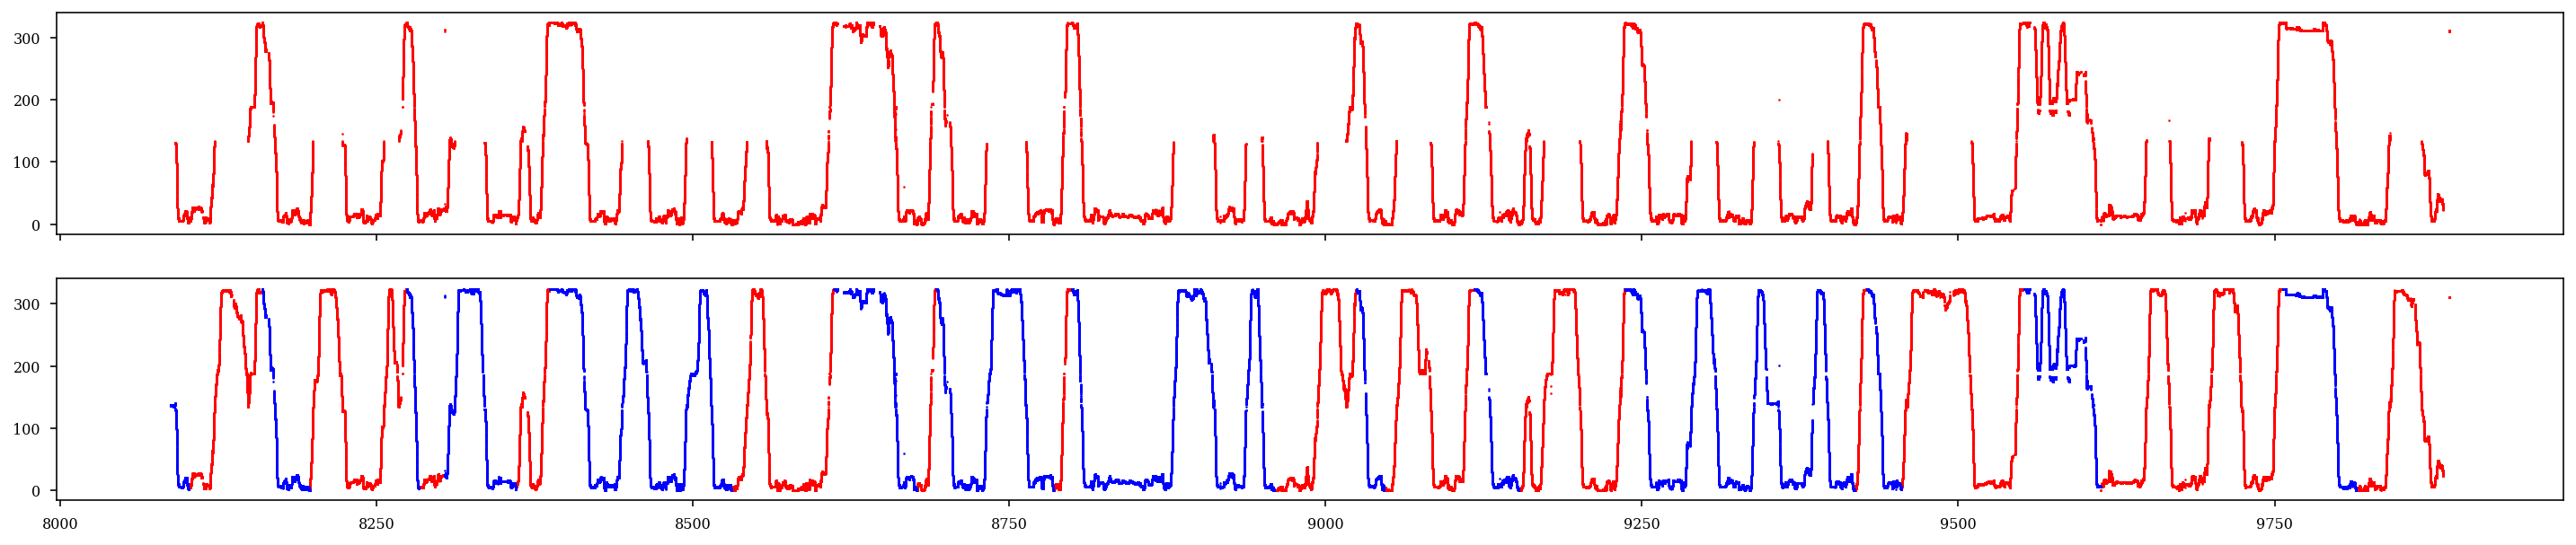

In [82]:
fig,ax = plt.subplots(2,1,figsize=(25,5),sharex=True,sharey=True)
center_right = (center_epochs | right_epochs).merge(gap=5)
# for ep in center_right:
ax[0].scatter(pos[epochs[2]][center_right].abscissa_vals ,pos[epochs[2]][center_right].data,color="red",s=1)

(outbound_epochs_new, inbound_epochs_new) = functions.get_linear_track_lap_epochs(
    pos[center_right].abscissa_vals, pos[center_right].data[0], newLapThreshold=20
)
# outbound_epochs_new = find_good_laps(pos, outbound_epochs_new)
# inbound_epochs_new = find_good_laps(pos, inbound_epochs_new)
ax[1].scatter(pos[epochs[2]][outbound_epochs_new].abscissa_vals ,pos[epochs[2]][outbound_epochs_new].data,color="red",s=1)
ax[1].scatter(pos[epochs[2]][inbound_epochs_new].abscissa_vals ,pos[epochs[2]][inbound_epochs_new].data,color="blue",s=1)


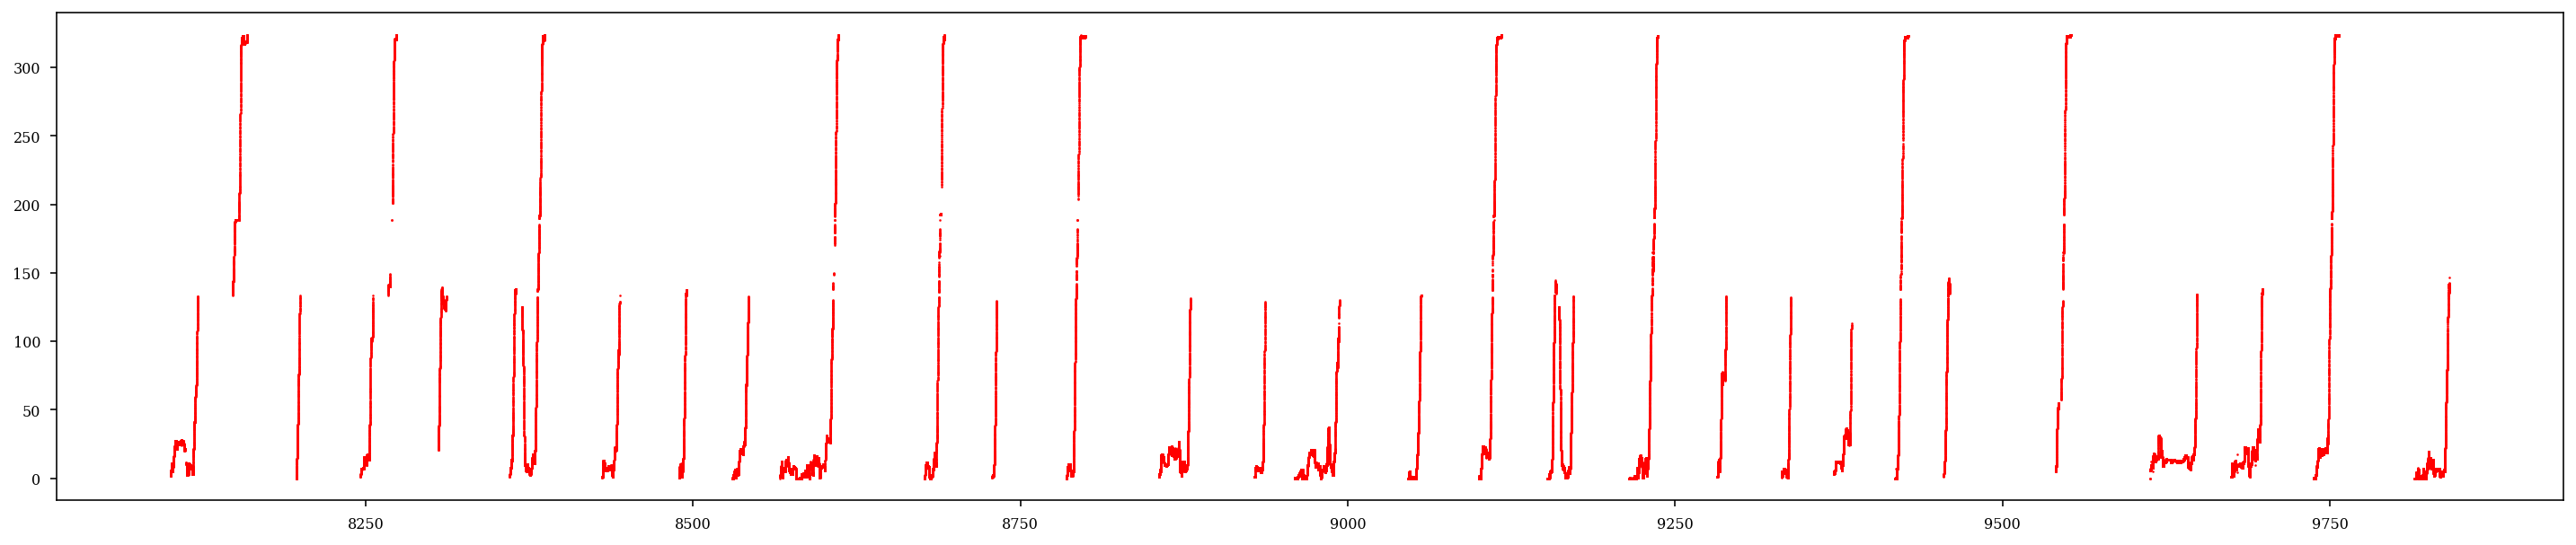

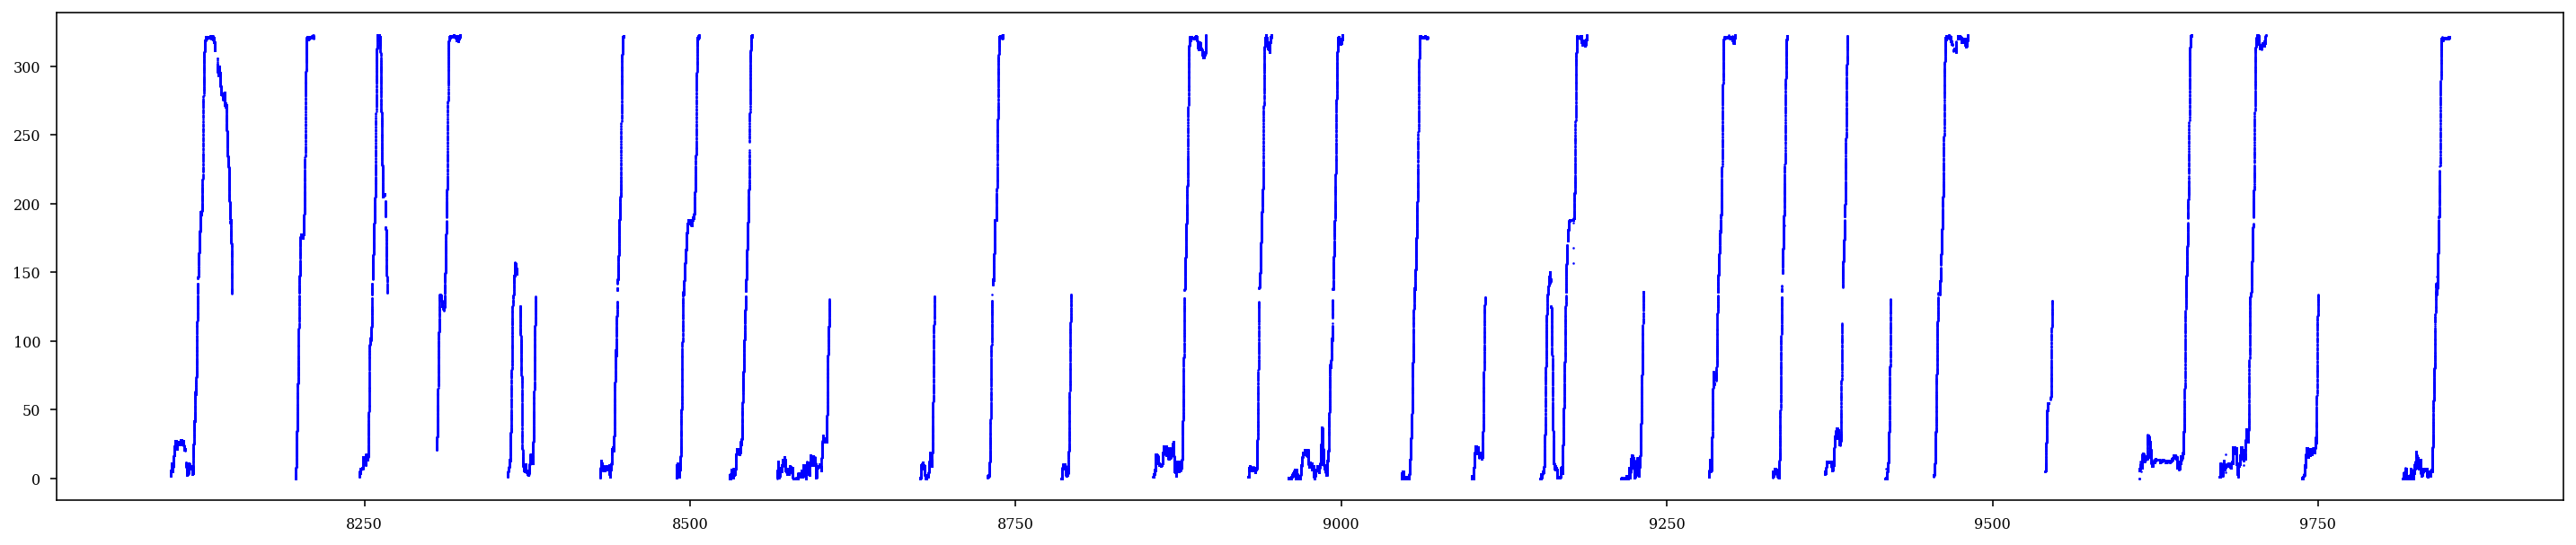

In [63]:
plt.figure(figsize=(25,5))
center_right = center_epochs | right_epochs
center_left = center_epochs | left_epochs
plt.scatter(pos[epochs[2]][outbound_epochs][center_right].abscissa_vals ,pos[epochs[2]][outbound_epochs][center_right].data,color="red",s=1)

plt.figure(figsize=(25,5))

plt.scatter(pos[epochs[2]][outbound_epochs][center_left].abscissa_vals ,pos[epochs[2]][outbound_epochs][center_left].data,color="blue",s=1)

c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


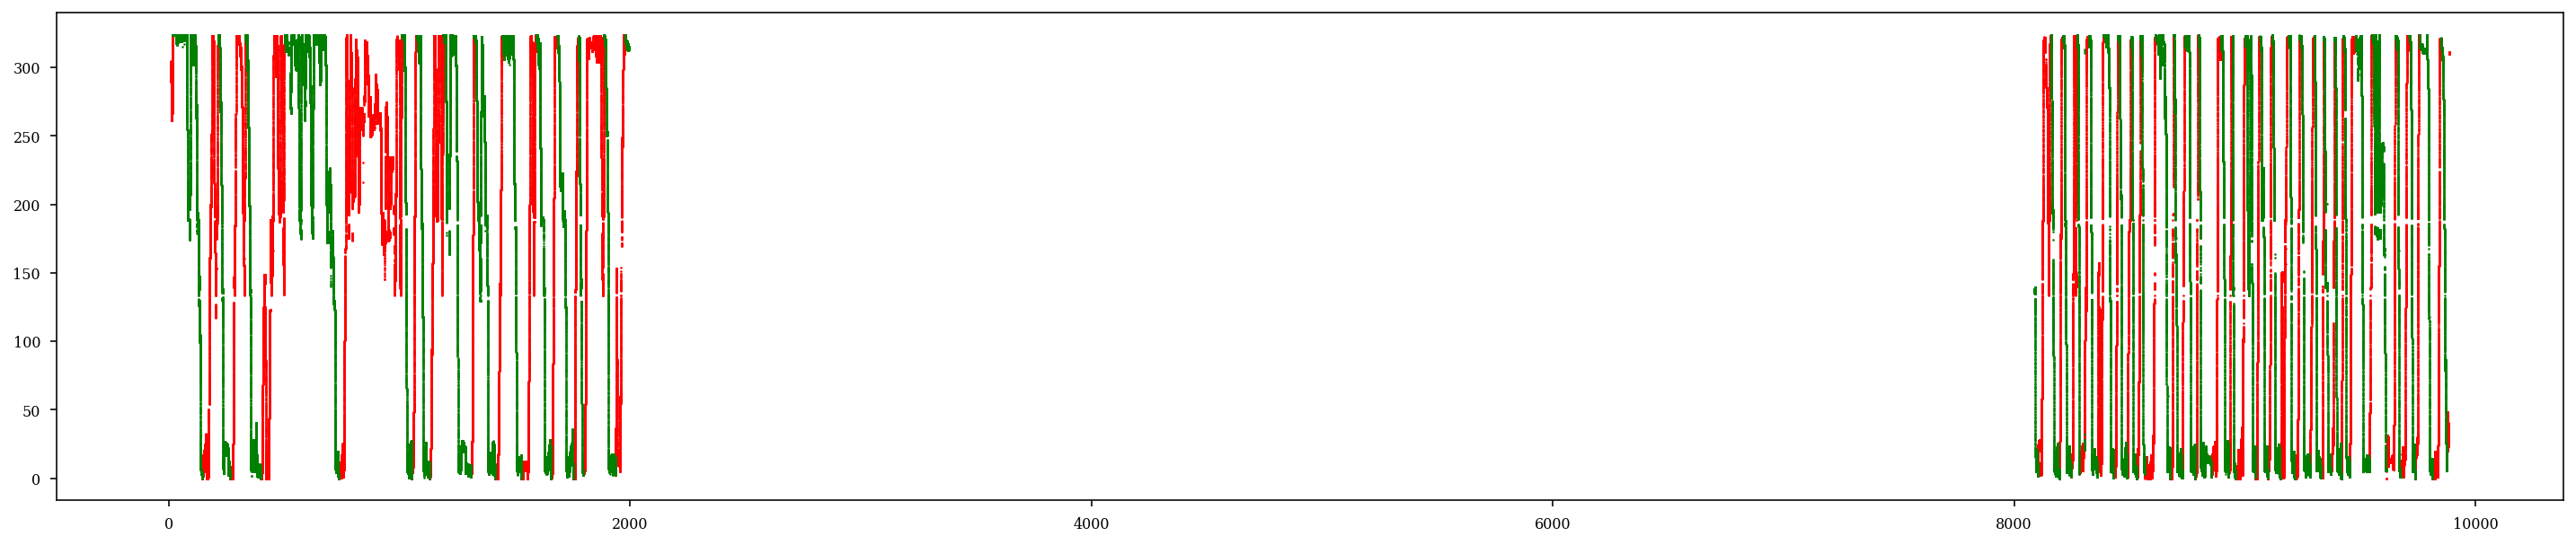

In [32]:
plt.figure(figsize=(25,5))
plt.scatter(pos[outbound_epochs].abscissa_vals ,pos[outbound_epochs].data,color="red",s=1)
plt.scatter(pos[inbound_epochs].abscissa_vals ,pos[inbound_epochs].data,color="green",s=1)

plt.show()

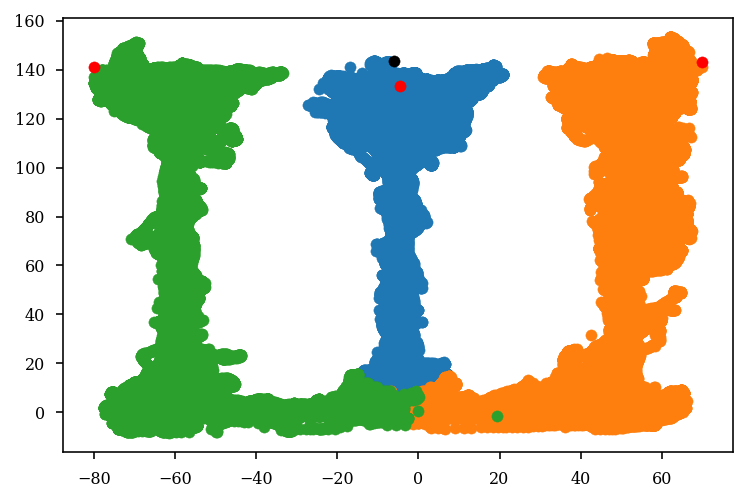

In [26]:
plt.scatter(position_df.query("states == 0").x, position_df.query("states == 0").y)
plt.scatter(position_df.query("states == 0").x.mean(), position_df.query("states == 0").y.max() - 10,color="r")
# plt.scatter(position_df.query("states == 0").x.median(), position_df.query("states == 0").y.max(),color="k")


plt.scatter(position_df.query("states == 1").x, position_df.query("states == 1").y)
plt.scatter(position_df.query("states == 1").x.max(), position_df.query("states == 1").y.max() - 10,color="r")


plt.scatter(position_df.query("states == 2").x, position_df.query("states == 2").y)
plt.scatter(position_df.query("states == 2").x.min(), position_df.query("states == 2").y.max() - 10,color="r")


In [77]:
import numpy as np
import pandas as pd
from scipy.ndimage.measurements import label

def enter_exit_target(position, target, max_distance=1):
    """Marks when a position has reached a target ("enter")
    and when it has left a target ("exit").
    The position is considered to have reached a target when it is less than
    the `max_distance` from the target.
    Enter and exit times are marked as follows:
     1: entered the target radius
     0: neither
    -1: exited the target radius
    Works for 1D position and 2D position.
    Parameters
    ----------
    position : ndarray, shape (n_time, n_space)
    target : ndarray, shape (1, n_space)
    max_distance : float, optional
        How close the position is to the target to be considered at the target.
    Returns
    -------
    enter_exit : ndarray, shape (n_time,)
    at_target : ndarray, shape (n_time,)
    """
    distance_from_target = paired_distances(position, target)
    at_target = distance_from_target < max_distance
    enter_exit = np.r_[0, np.diff(at_target.astype(float))]
    return enter_exit, at_target

def paired_distances(x, y):
    '''Euclidean distance between x and y at each time point.
    Parameters
    ----------
    x,y : ndarray, shape (n_time, n_space)
    Returns
    -------
    distance : ndarray, shape (n_time,)
    '''
    x, y = np.array(x), np.array(y)
    x = np.atleast_2d(x).T if x.ndim < 2 else x
    y = np.atleast_2d(y).T if y.ndim < 2 else y
    return np.linalg.norm(x - y, axis=1)


def enter_exit_target(position, target, max_distance=1):
    '''Marks when a position has reached a target ("enter")
    and when it has left a target ("exit").
    The position is considered to have reached a target when it is less than
    the `max_distance` from the target.
    Enter and exit times are marked as follows:
     1: entered the target radius
     0: neither
    -1: exited the target radius
    Works for 1D position and 2D position.
    Parameters
    ----------
    position : ndarray, shape (n_time, n_space)
    target : ndarray, shape (1, n_space)
    max_distance : float, optional
        How close the position is to the target to be considered at the target.
    Returns
    -------
    enter_exit : ndarray, shape (n_time,)
    at_target : ndarray, shape (n_time,)
    '''
    distance_from_target = paired_distances(position, target)
    at_target = distance_from_target < max_distance
    enter_exit = np.r_[0, np.diff(at_target.astype(float))]
    return enter_exit, at_target


def shift_well_enters(enter_exit):
    '''Shifts the enter times back one time point.'''
    shifted_enter_exit = enter_exit.copy()
    old_ind = np.where(enter_exit > 0)[0]  # positive entries are well-entries
    new_ind = old_ind - 1
    shifted_enter_exit[new_ind] = enter_exit[old_ind]
    shifted_enter_exit[old_ind] = 0
    return shifted_enter_exit


def segment_path(time, position, well_locations, max_distance_from_well=10):
    '''Label traversals between each well location.
    Parameters
    ----------
    time : ndarray, shape (n_time,)
    position : ndarray, shape (n_time, n_space)
    well_locations : array_like, shape (n_wells, n_space)
    max_distance_from_well : float, optional
        The animal is considered at a well location if its position is closer
        than this value.
    Returns
    -------
    segments_df : pandas DataFrame, shape (n_segments, 6)
    labeled_segments : pandas DataFrame, shape (n_time,)
    '''
    n_wells = len(well_locations)
    well_enter_exit, at_target = np.stack(
        [enter_exit_target(position, np.atleast_2d(well),
                           max_distance_from_well)
         for well in well_locations], axis=1)

    well_labels = np.arange(n_wells) + 1
    well_enter_exit = np.sum(well_enter_exit.T * well_labels, axis=1)
    shifted_well_enter_exit = shift_well_enters(well_enter_exit)
    is_segment = ~(np.sum(at_target, axis=0) > 0)
    labeled_segments, n_segment_labels = label(is_segment)
    segment_labels = np.arange(n_segment_labels) + 1

    start_time, end_time, duration = [], [], []
    distance_traveled, from_well, to_well = [], [], []

    for segment_label in segment_labels:
        is_seg = np.in1d(labeled_segments, segment_label)
        segment_time = time[is_seg]
        start_time.append(segment_time.min())
        end_time.append(segment_time.max())
        duration.append(segment_time.max() - segment_time.min())
        try:
            start, _, end = np.unique(shifted_well_enter_exit[is_seg])
        except ValueError:
            start, end = np.nan, np.nan

        from_well.append(np.abs(start))
        to_well.append(np.abs(end))
        p = position[is_seg]
        distance_traveled.append(np.sum(paired_distances(p[1:], p[:-1])))

    data = [('start_time', start_time), ('end_time', end_time),
            ('duration', duration), ('from_well', from_well),
            ('to_well', to_well),
            ('distance_traveled', distance_traveled)]
    index = pd.Index(segment_labels, name='segment')
    return (pd.DataFrame.from_dict(dict(data)).set_index(index),
            pd.DataFrame(dict(labeled_segments=labeled_segments), index=time))


def find_last_non_center_well(segments_df, segment_ind):
    last_wells = segments_df.iloc[:segment_ind].to_well
    try:
        return last_wells[last_wells != 'center'].iloc[-1]
    except IndexError:
        # There are no non-center wells. Just return current well.
        return ''


def get_correct_inbound_outbound(segments_df):
    n_segments = segments_df.shape[0]
    task = np.empty((n_segments,), dtype=object)
    is_correct = np.empty((n_segments,), dtype=bool)

    for segment_ind in np.arange(n_segments):
        if segments_df.iloc[segment_ind].from_well == 'center':
            task[segment_ind] = 'Outbound'
            is_correct[segment_ind] = (
                segments_df.iloc[segment_ind].to_well !=
                find_last_non_center_well(segments_df, segment_ind))
        else:
            task[segment_ind] = 'Inbound'
            is_correct[segment_ind] = (
                segments_df.iloc[segment_ind].to_well == 'center')

    segments_df['task'] = task
    segments_df['is_correct'] = is_correct

    return segments_df


def score_inbound_outbound(segments_df, min_distance_traveled=100):
    '''In the alternating arm task, determines whether the trial should be
    inbound (running to the center arm) or outbound (running to the opposite
    outer arm as before) and if the trial was performed correctly.
    Parameters
    ----------
    segments_df : pandas DataFrame
        Output of `segment_path` function.
    min_distance_traveled : float, optional
        Minimum path length (in cm) while outside of the well radius for
        a segment to be considered as a trial.
    Returns
    -------
    segments_df : pandas DataFrame
        Same as the input dataframe but with the wells labeled
        (left, right, center) and columns for `task` (inbound/outbound) and
        `is_correct` (True/False).
    '''
    segments_df = (segments_df.copy()
                   .loc[segments_df.distance_traveled > min_distance_traveled]
                   .dropna())
    WELL_NAMES = {
        1: 'center',
        2: 'left',
        3: 'right'
    }
    segments_df = segments_df.assign(
        to_well=lambda df: df.to_well.map(WELL_NAMES),
        from_well=lambda df: df.from_well.map(WELL_NAMES))
    return get_correct_inbound_outbound(segments_df)

C:\Users\Cornell\AppData\Local\Temp\ipykernel_5644\2102701360.py:3: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.


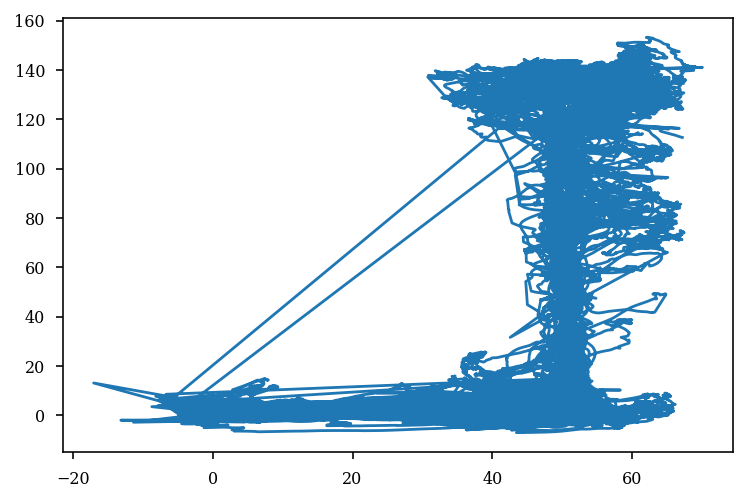

In [100]:
plt.plot(position_df.query("states == 1").x,position_df.query("states == 1").y)

In [101]:
well_locations = np.array(
    [
        [
            position_df.query("states == 0").x.mean(),
            position_df.query("states == 0").y.max(),
        ],
        [
            position_df.query("states == 2").x.mean(),
            position_df.query("states == 2").y.max(),
        ],
        [
            position_df.query("states == 1").x.mean(),
            position_df.query("states == 1").y.max(),
        ]
    ]
)
temp_df = position_df[~np.isnan(position_df.x)]
segments_df, labeled_segments = segment_path(
    temp_df["timestamps"].values,
    temp_df[["x", "y"]].values,
    well_locations,
    max_distance_from_well=20,
)


segments_df = score_inbound_outbound(segments_df, min_distance_traveled=50)
segments_df

start_time    end_time  duration from_well to_well  \
segment                                                       
12         75.97020    93.87755  17.90735     right   right   
13        100.52720   109.39340   8.86620     right   right   
15        114.18480   136.93355  22.74875     right  center   
17        148.45790   152.09940   3.64150    center  center   
18        153.16600   161.16555   7.99955    center  center   
...             ...         ...       ...       ...     ...   
663      9759.00095  9788.09100  29.09005     right   right   
666      9790.72420  9800.69030   9.96610     right  center   
672      9815.93115  9819.63930   3.70815    center  center   
681      9837.70495  9844.70460   6.99965    center    left   
682      9851.89585  9873.50300  21.60715      left  center   

         distance_traveled      task  is_correct  
segment                                           
12              538.957962   Inbound       False  
13              143.523205   Inbound       False  
15              703.043502   Inbound        True  
17               55.308834  Outbound        True  
18              149.345573  Outbound        True  
...                    ...       ...         ...  
663             119.953728   Inbound       False  
666             406.199666   Inbound        True  
672              57.266441  Outbound        True  
681             411.265912  Outbound        True  
682             552.259671   Inbound        True  

[179 rows x 8 columns]

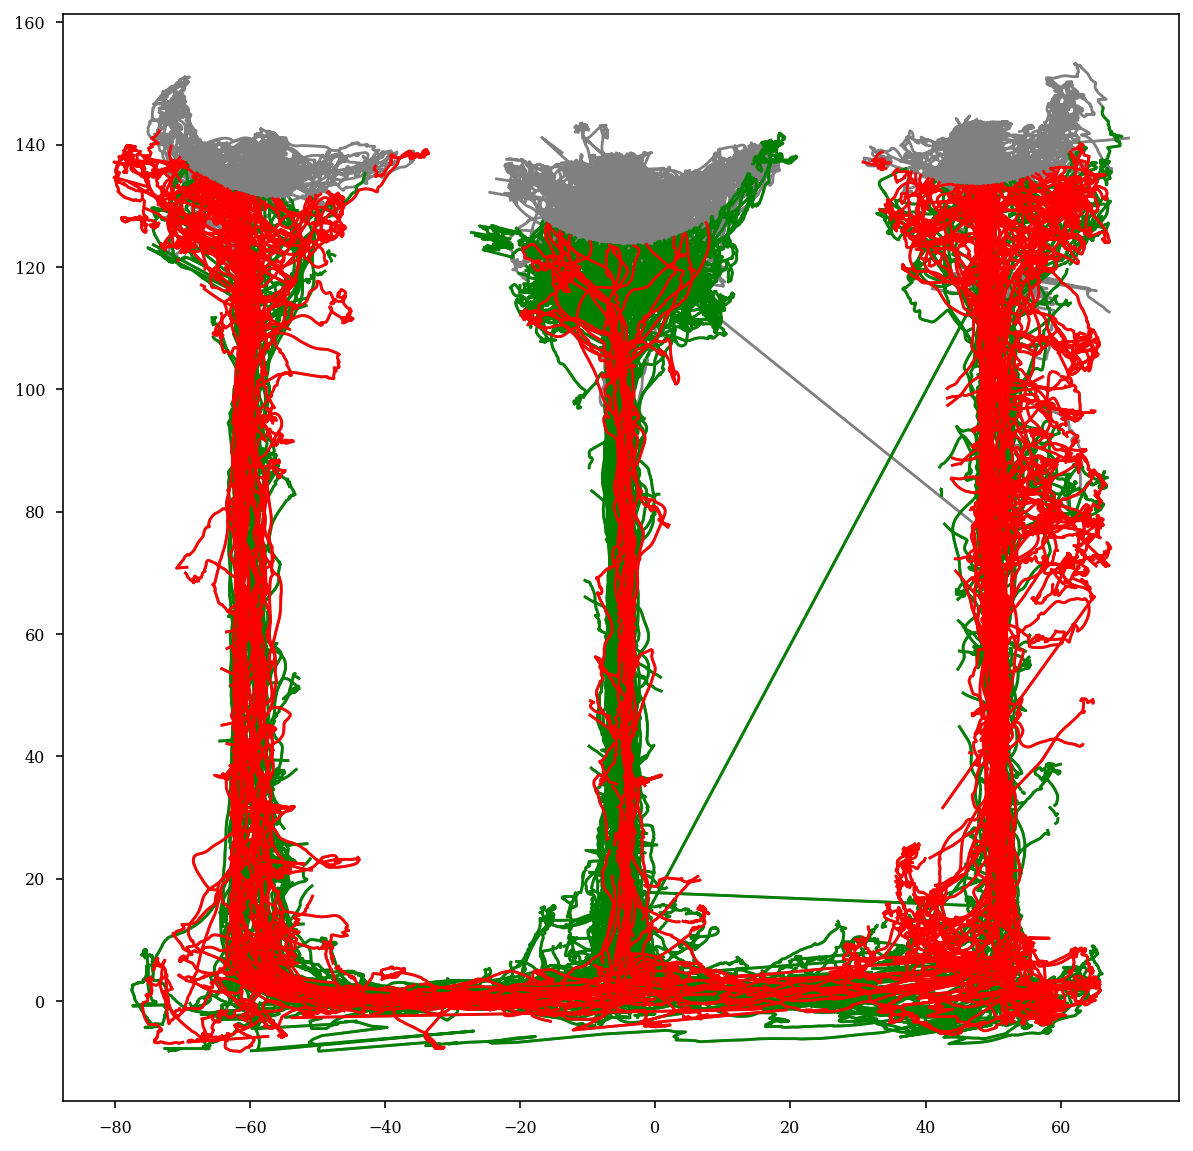

In [102]:
plt.figure(figsize=(10, 10))
plt.plot(position_df.x, position_df.y,color="grey")
for ep in segments_df.query("is_correct == True").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    plt.plot(
        position_df[idx].x,
        position_df[idx].y,
        color="green"
    )
for ep in segments_df.query("is_correct == False").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    plt.plot(
        position_df[idx].x,
        position_df[idx].y,
        color="red"
    )
# position_df.query('timestamps >=631.39810 & timestamps <=641.21425').plot(x='x', y='y')


Text(0.5, 1.0, "from_well == 'right' & to_well == 'center'")

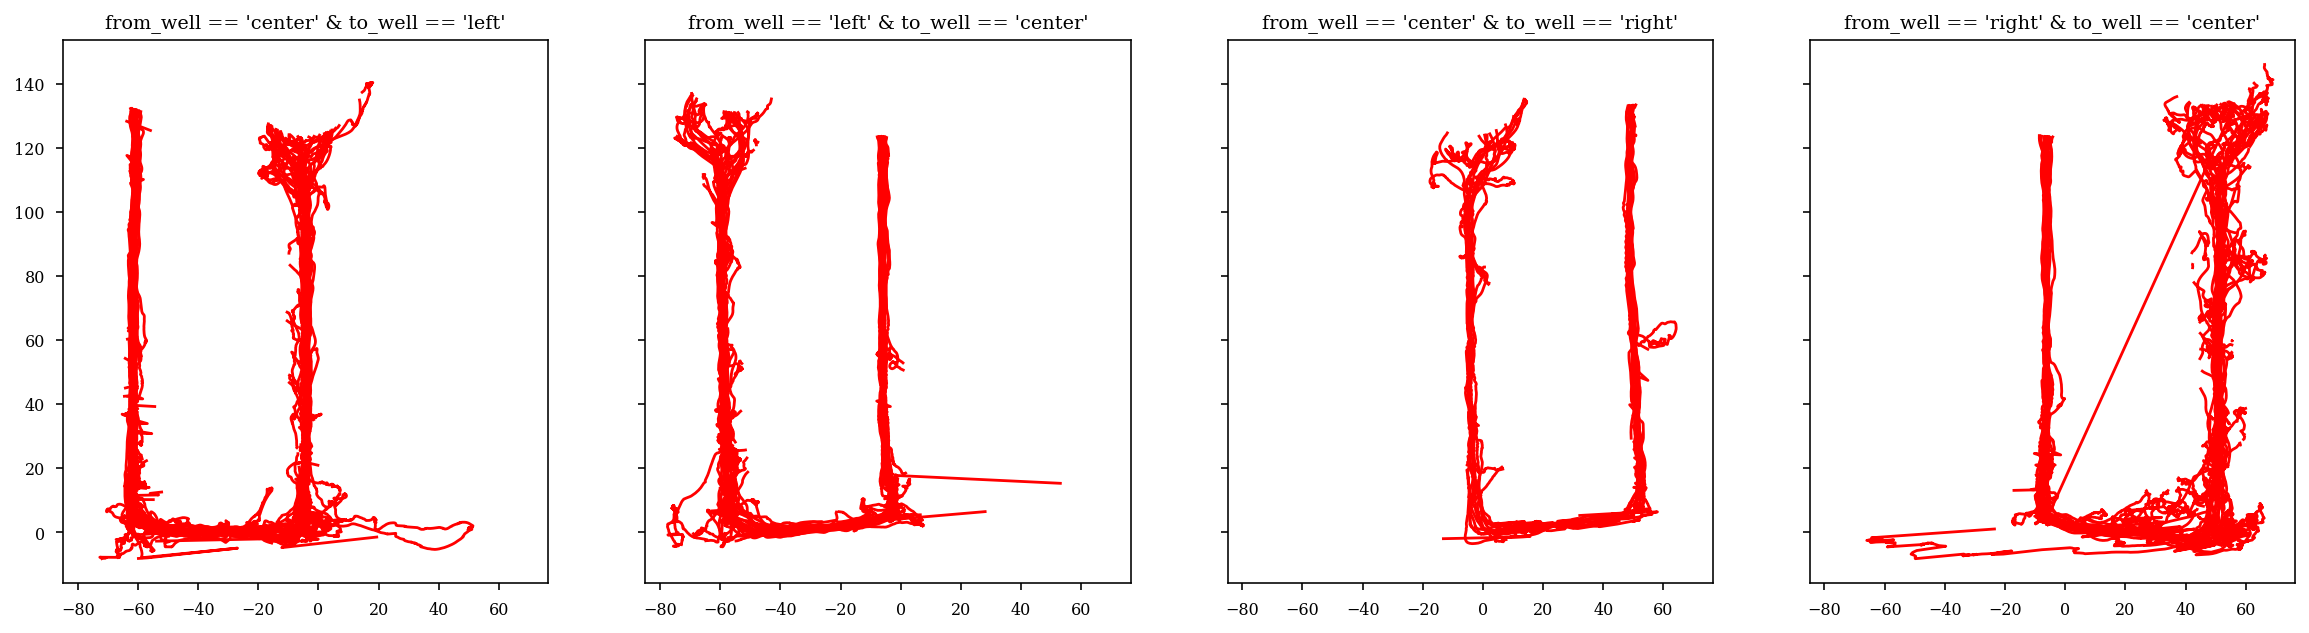

In [112]:
fig,ax = plt.subplots(1,4,figsize=(20, 5),sharey=True,sharex=True)
for ep in segments_df.query("from_well == 'center' & to_well == 'left'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    ax[0].plot(
        position_df[idx].x,
        position_df[idx].y,
        color="red"
    )

for ep in segments_df.query("from_well == 'left' & to_well == 'center'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    ax[1].plot(
        position_df[idx].x,
        position_df[idx].y,
        color="red"
    )

for ep in segments_df.query("from_well == 'center' & to_well == 'right'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    ax[2].plot(
        position_df[idx].x,
        position_df[idx].y,
        color="red"
    )

for ep in segments_df.query("from_well == 'right' & to_well == 'center'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    ax[3].plot(
        position_df[idx].x,
        position_df[idx].y,
        color="red"
    )

ax[0].set_title("from_well == 'center' & to_well == 'left'")
ax[1].set_title("from_well == 'left' & to_well == 'center'")
ax[2].set_title("from_well == 'center' & to_well == 'right'")
ax[3].set_title("from_well == 'right' & to_well == 'center'")

(8000.0, 10000.0)

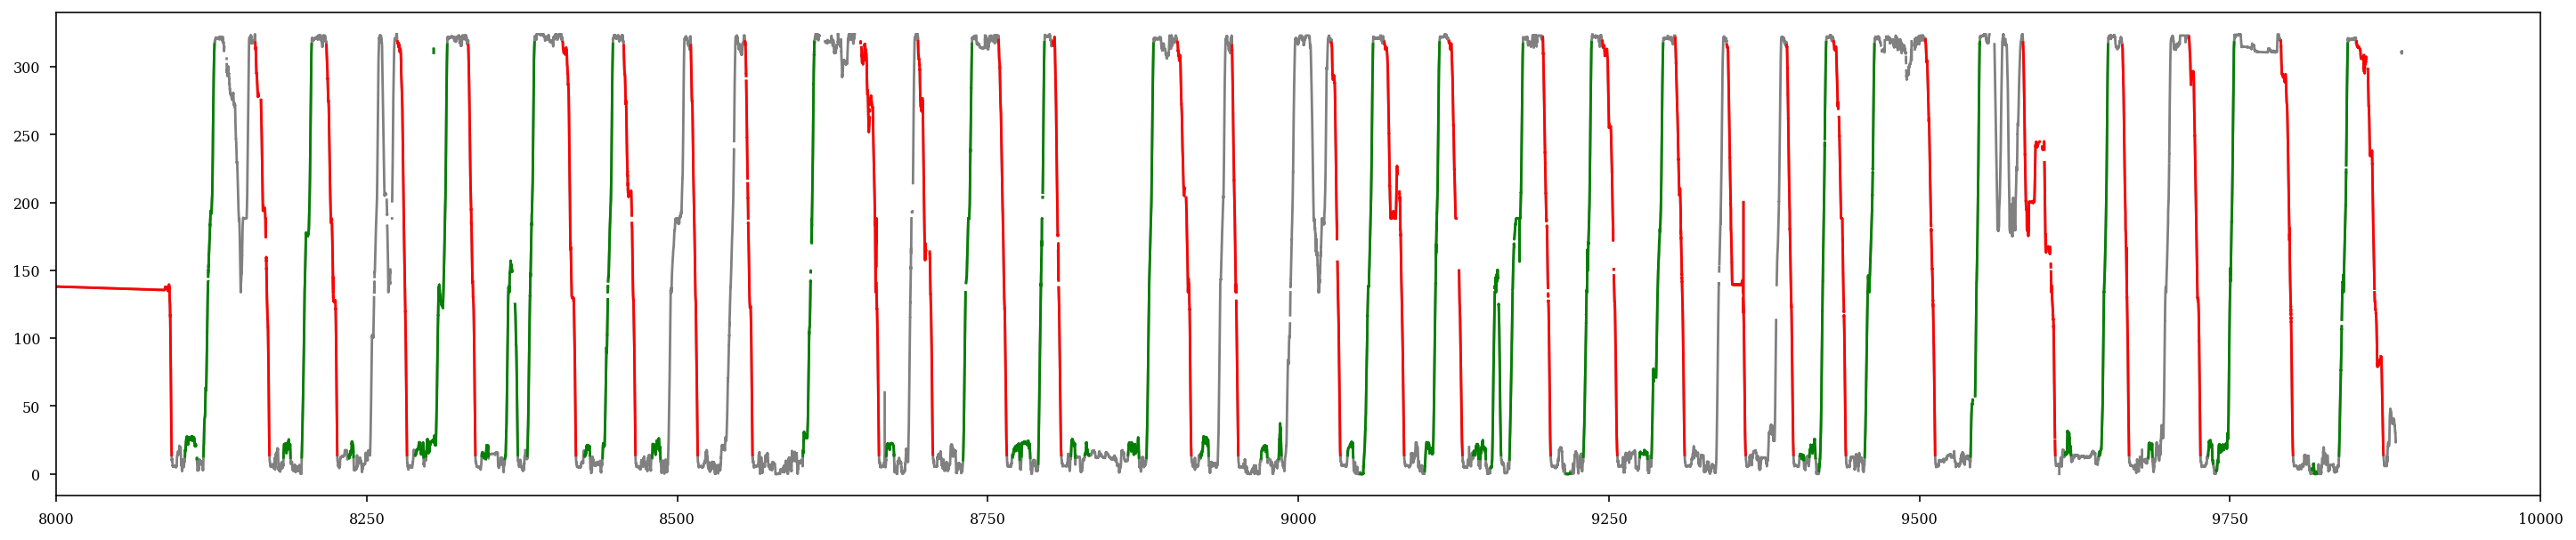

In [97]:
plt.figure(figsize=(25, 5))

plt.plot(
    position_df.timestamps,
    position_df.linearized,
    color="grey"
)
for ep in segments_df.query("is_correct == True & task == 'Inbound'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    plt.plot(
        position_df[idx].timestamps,
        position_df[idx].linearized,
        color="red"
    )

for ep in segments_df.query("is_correct == True & task == 'Outbound'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    plt.plot(
        position_df[idx].timestamps,
        position_df[idx].linearized,
        color="green"
    )

plt.xlim(8000, 10000)

(8000.0, 10000.0)

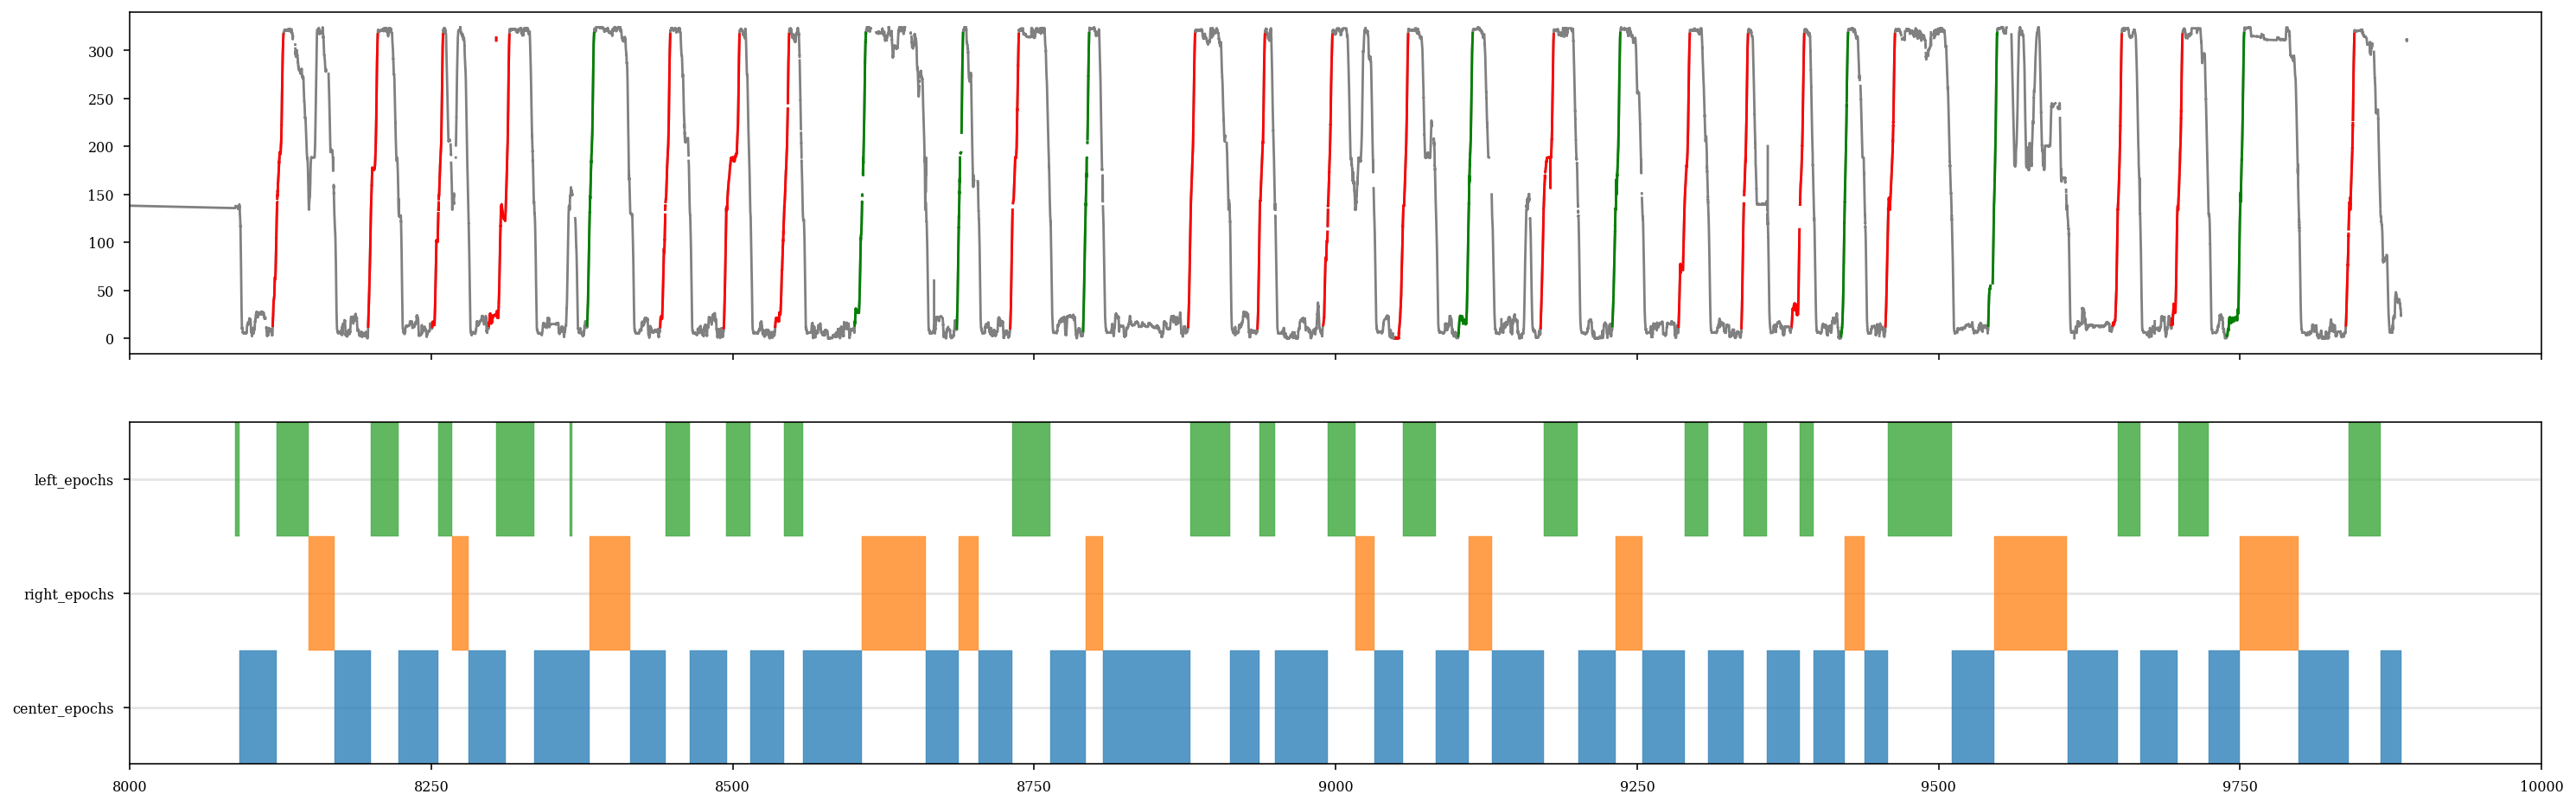

In [98]:
fig,ax = plt.subplots(2,1,figsize=(25, 8),sharex=True)

ax[0].plot(
    position_df.timestamps,
    position_df.linearized,
    color="grey"
)
for ep in segments_df.query("from_well == 'center' & to_well == 'right'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    ax[0].plot(
        position_df[idx].timestamps,
        position_df[idx].linearized,
        color="red"
    )

for ep in segments_df.query("from_well == 'center' & to_well == 'left'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    ax[0].plot(
        position_df[idx].timestamps,
        position_df[idx].linearized,
        color="green"
    )
events = []
events.append(center_epochs)
events.append(right_epochs)
events.append(left_epochs)
custom_plots.plot_events(events,['center_epochs','right_epochs','left_epochs'],ax=ax[1])

ax[0].set_xlim(8000, 10000)

(8000.0, 10000.0)

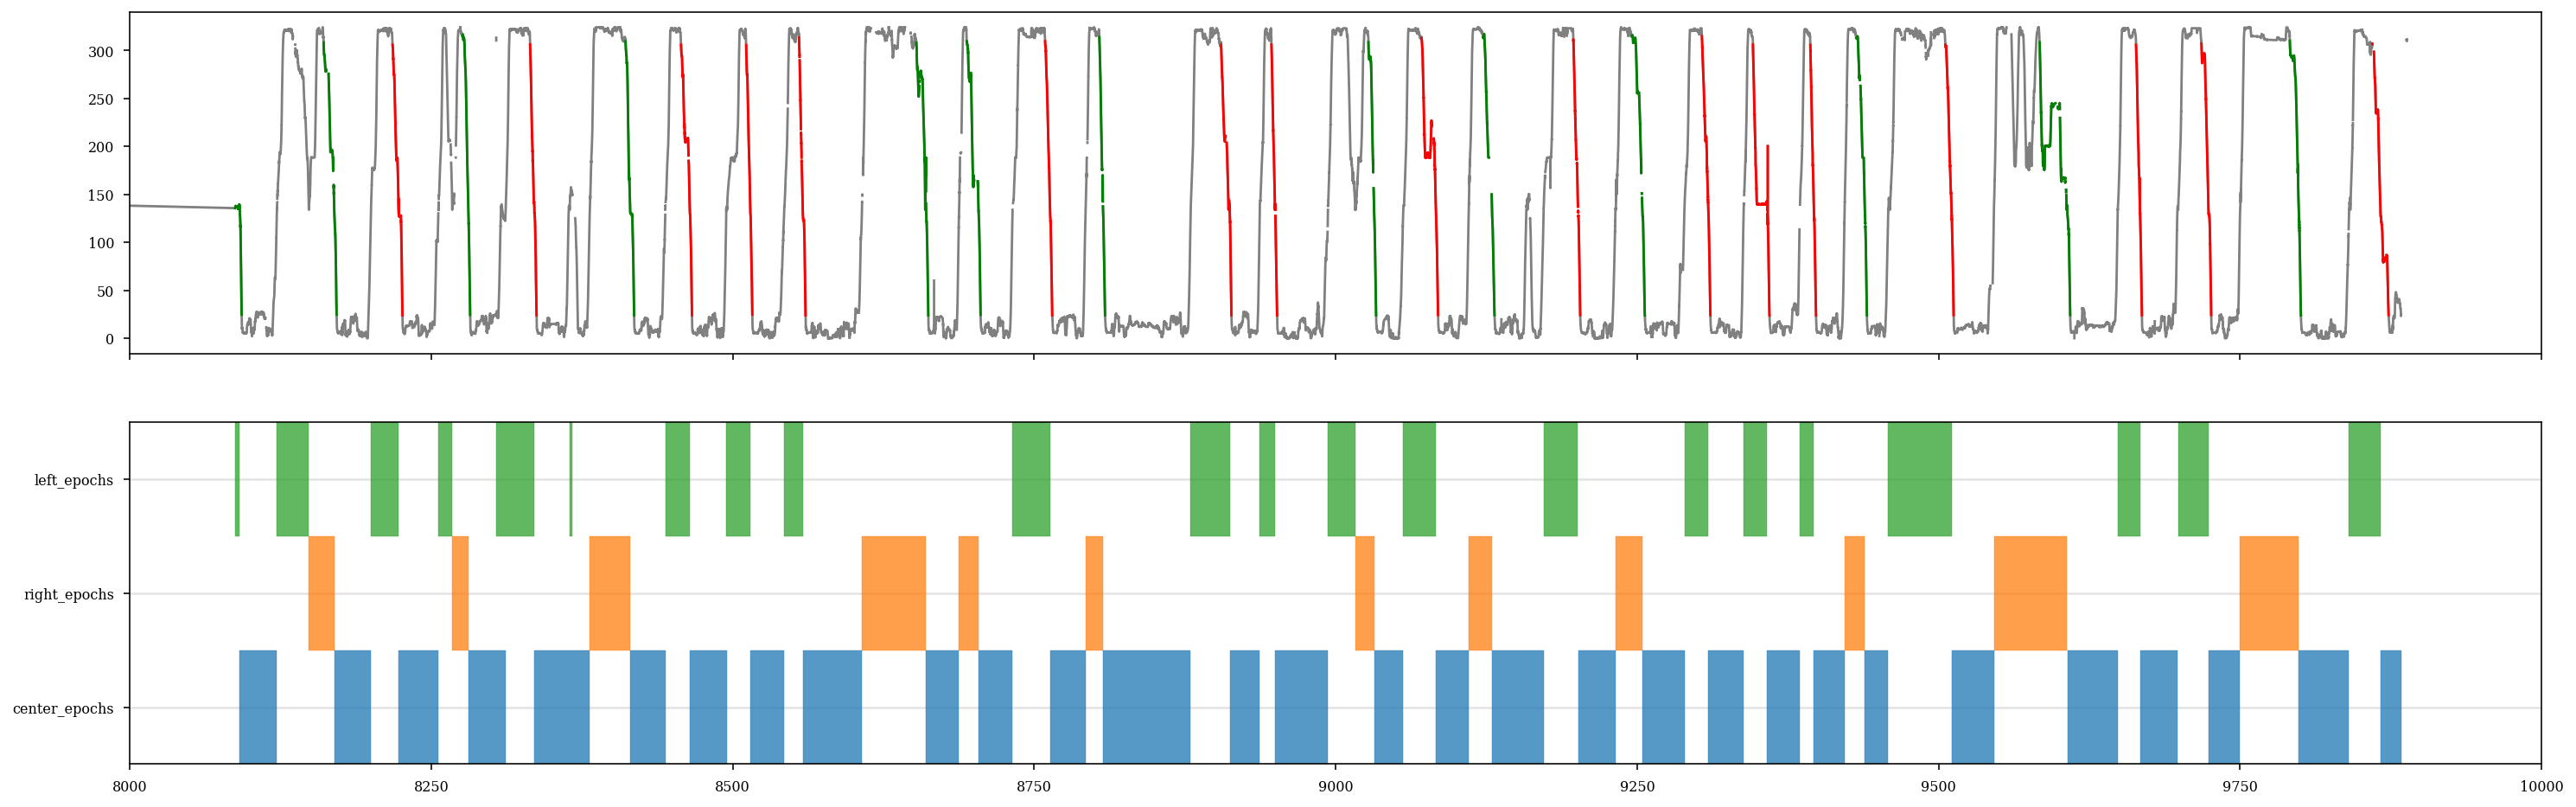

In [94]:
fig,ax = plt.subplots(2,1,figsize=(25, 8),sharex=True)

ax[0].plot(
    position_df.timestamps,
    position_df.linearized,
    color="grey"
)
for ep in segments_df.query("from_well == 'right' & to_well == 'center'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    ax[0].plot(
        position_df[idx].timestamps,
        position_df[idx].linearized,
        color="red"
    )

for ep in segments_df.query("from_well == 'left' & to_well == 'center'").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    ax[0].plot(
        position_df[idx].timestamps,
        position_df[idx].linearized,
        color="green"
    )
events = []
events.append(center_epochs)
events.append(right_epochs)
events.append(left_epochs)
custom_plots.plot_events(events,['center_epochs','right_epochs','left_epochs'],ax=ax[1])

ax[0].set_xlim(8000, 10000)